In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from starkiller import *
import matplotlib.pyplot as plt
%matplotlib notebook

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

Number of sources brighter than 25: 136
wcs shift:  [ 2.58933013e+01 -3.35646237e+00  2.63083561e-03]
Coords transformed
Calculating PSF coord shift
PSF shift:  [-1.08874297  0.22889024  0.        ]


<IPython.core.display.Javascript object>


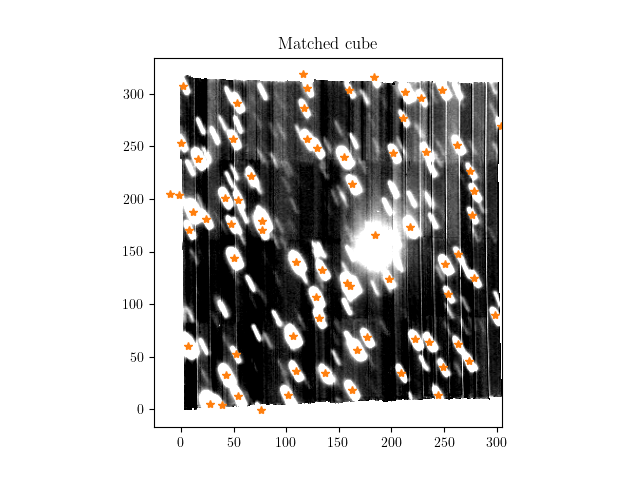

!!! Large difference of 0.13 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'
Made PSF
Using the data PSF
Background subtracted
Extracted spectra


<IPython.core.display.Javascript object>


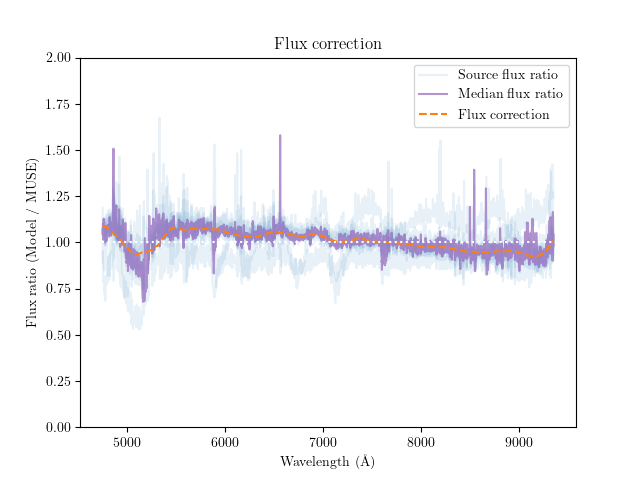

<IPython.core.display.Javascript object>


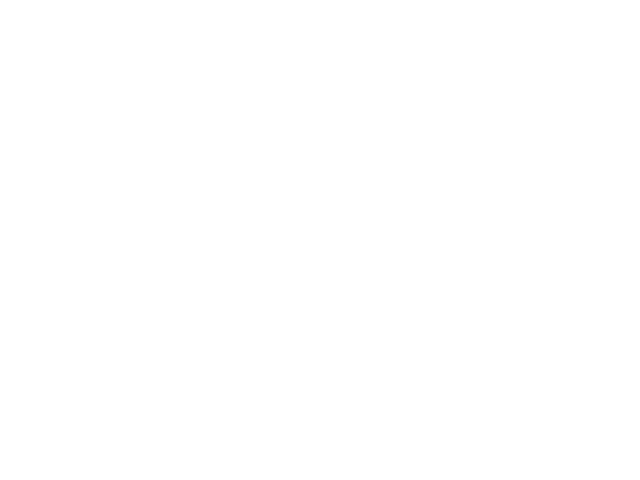

<IPython.core.display.Javascript object>


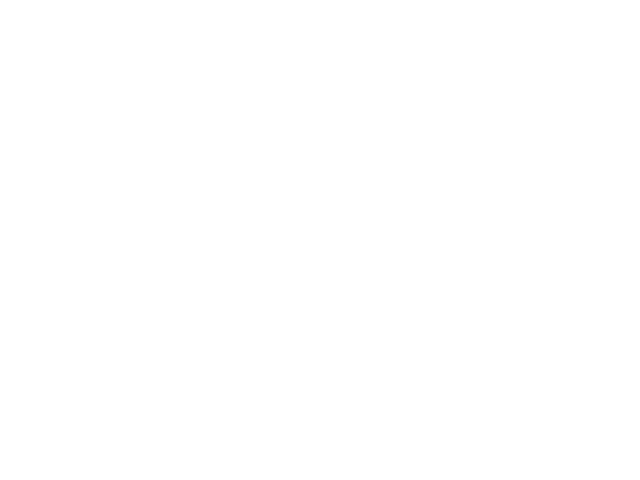

<IPython.core.display.Javascript object>


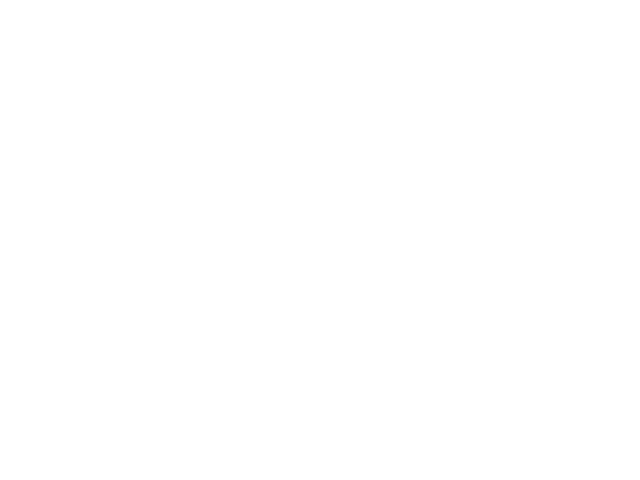

<IPython.core.display.Javascript object>


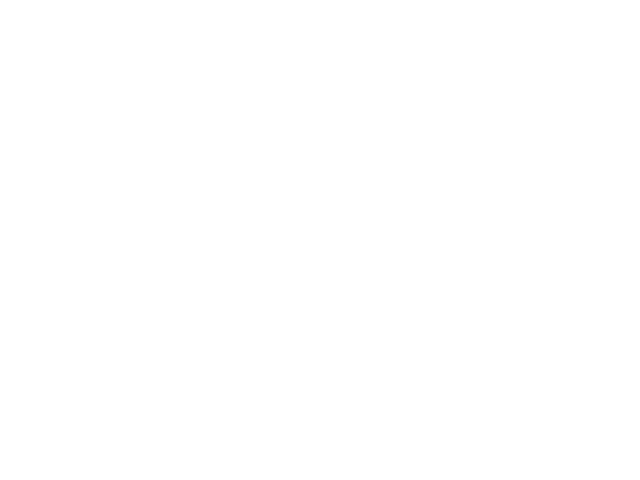

<IPython.core.display.Javascript object>


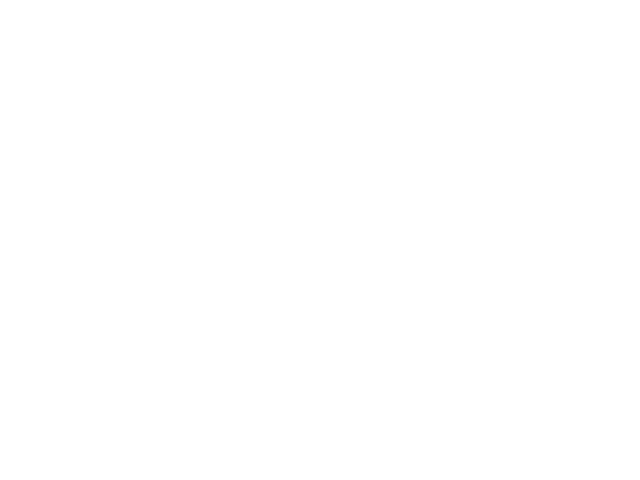

<IPython.core.display.Javascript object>


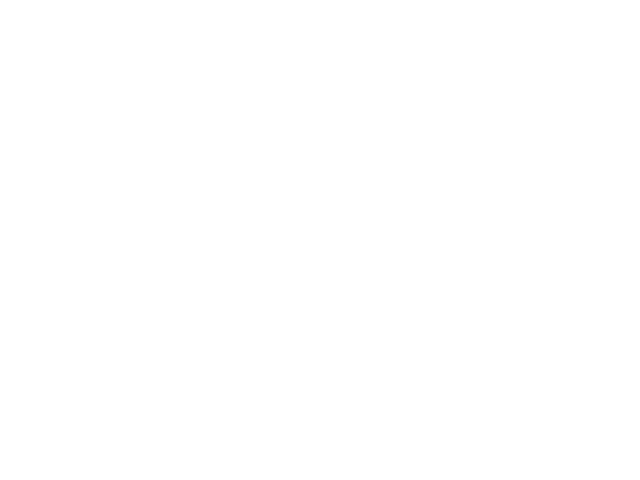

<IPython.core.display.Javascript object>


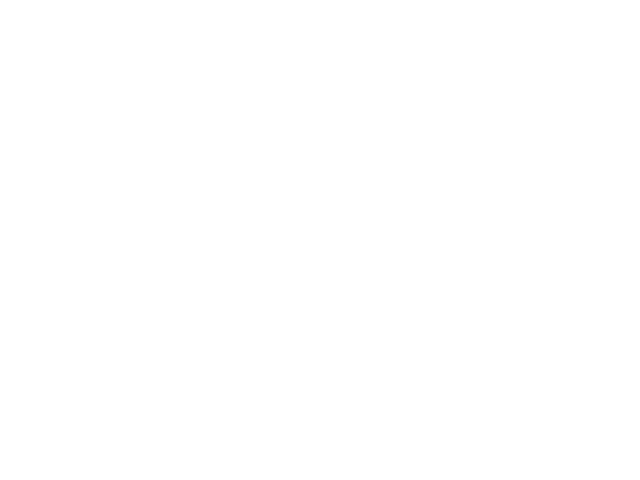

<IPython.core.display.Javascript object>


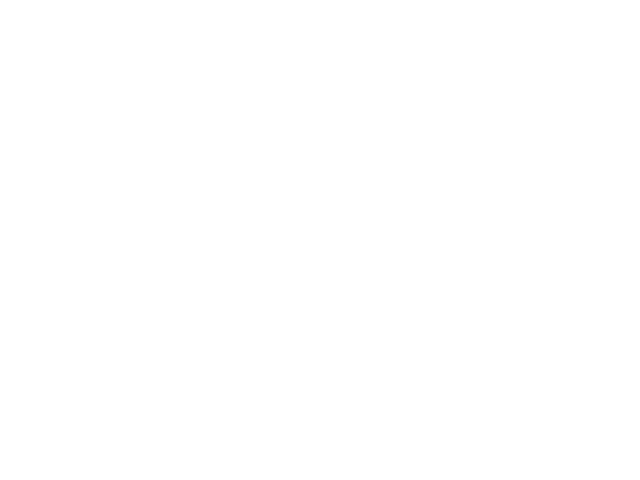

<IPython.core.display.Javascript object>


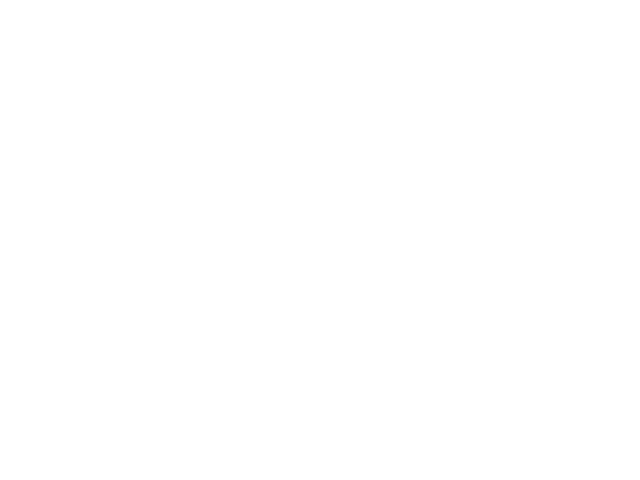

<IPython.core.display.Javascript object>


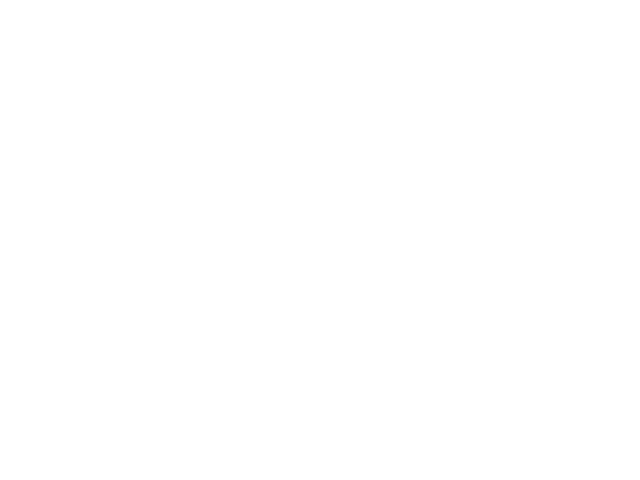

<IPython.core.display.Javascript object>


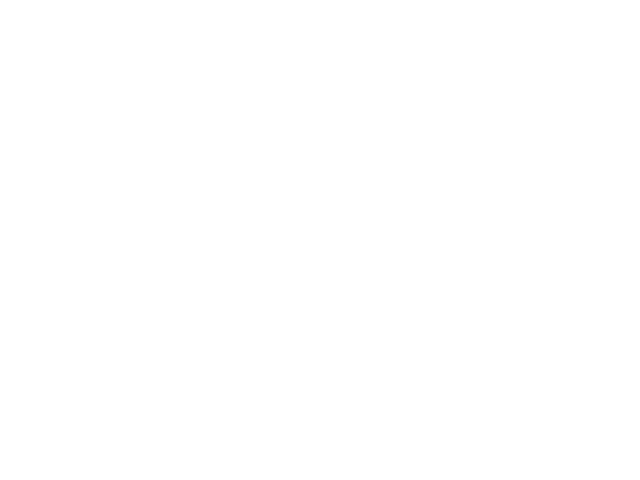

<IPython.core.display.Javascript object>


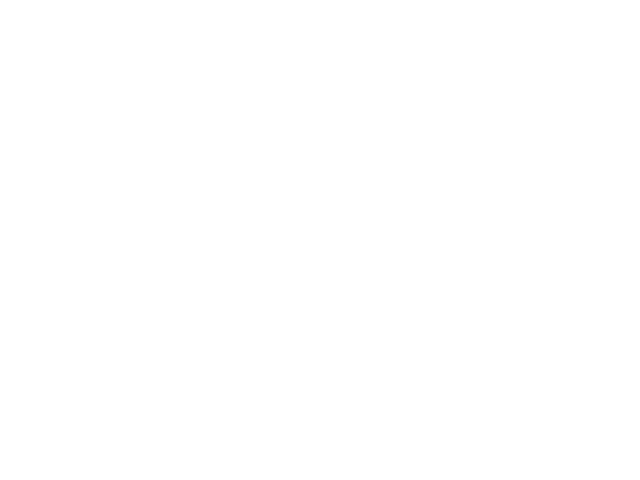

<IPython.core.display.Javascript object>


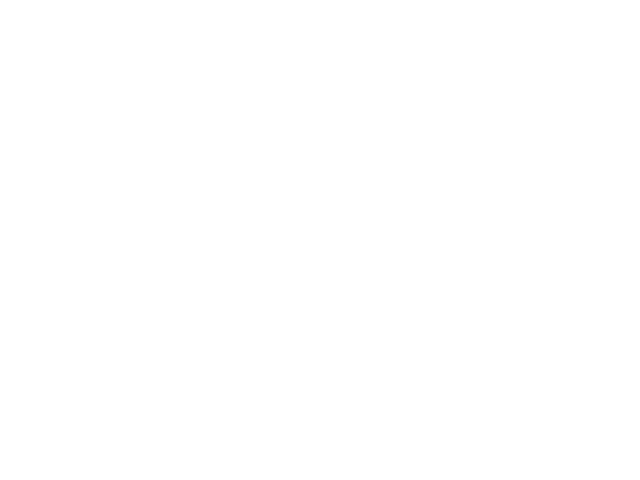

<IPython.core.display.Javascript object>


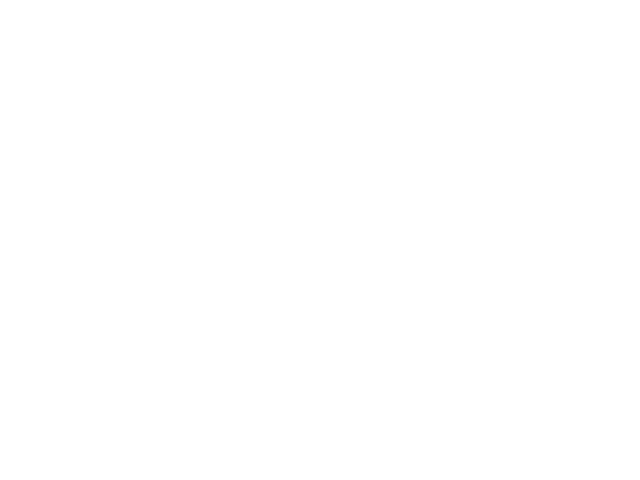

<IPython.core.display.Javascript object>


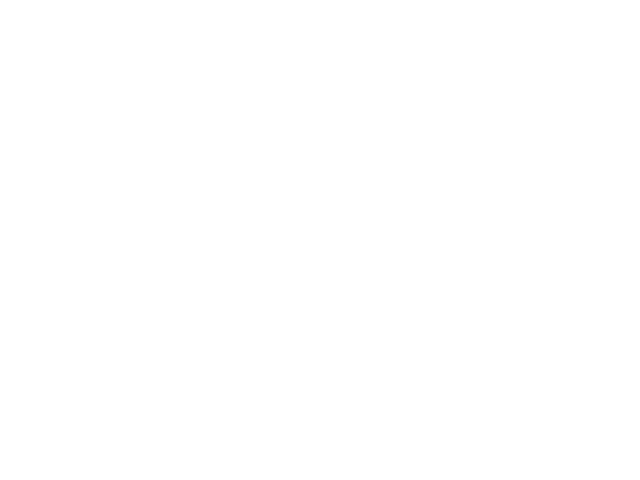

<IPython.core.display.Javascript object>


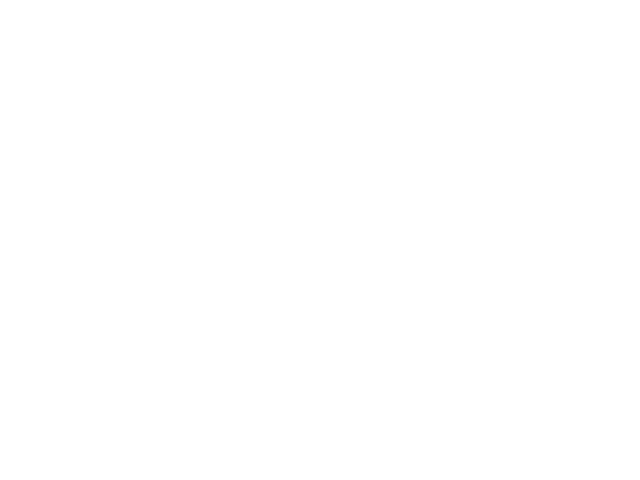

<IPython.core.display.Javascript object>


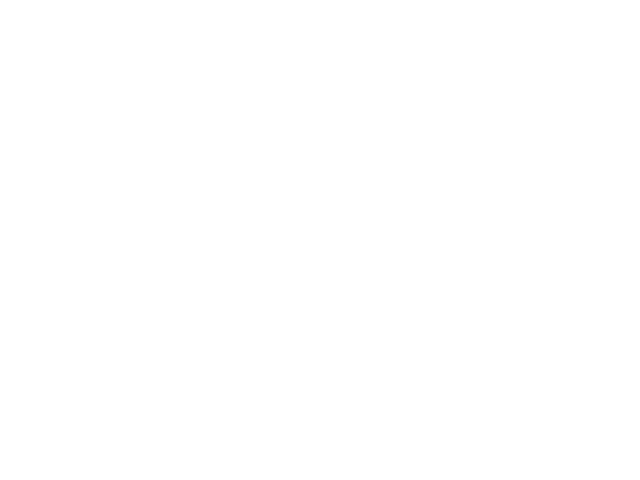

<IPython.core.display.Javascript object>


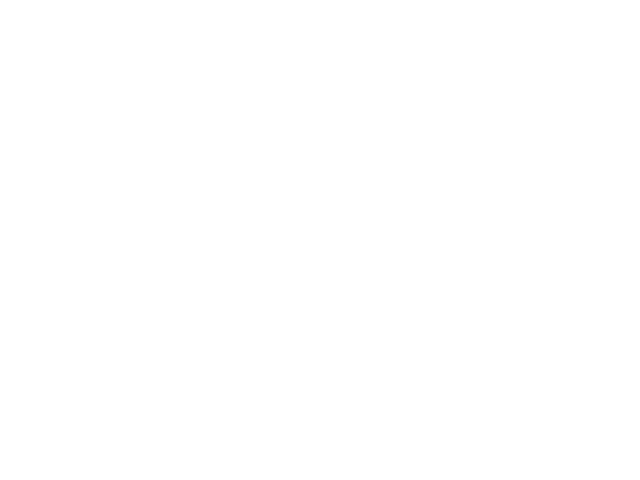

<IPython.core.display.Javascript object>


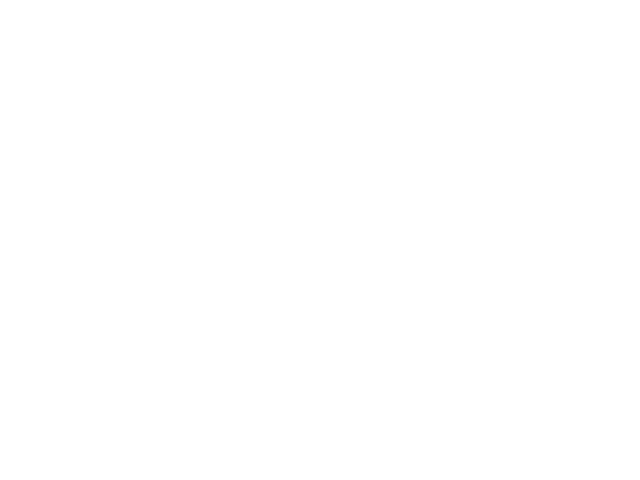

<IPython.core.display.Javascript object>


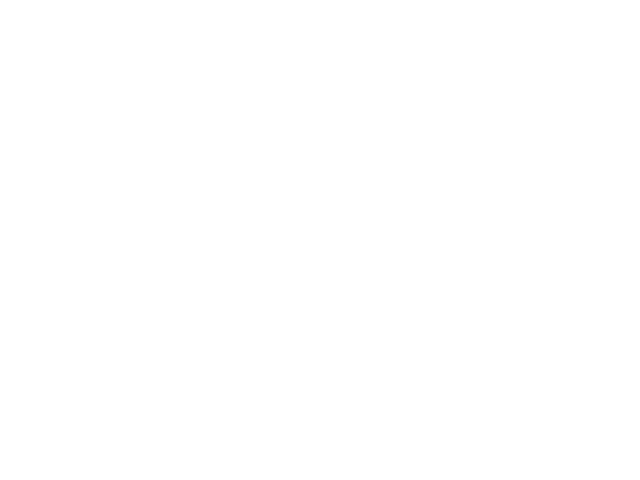

<IPython.core.display.Javascript object>


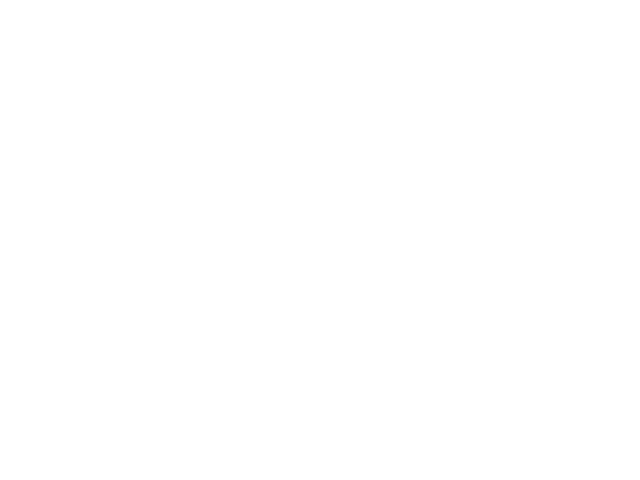

<IPython.core.display.Javascript object>


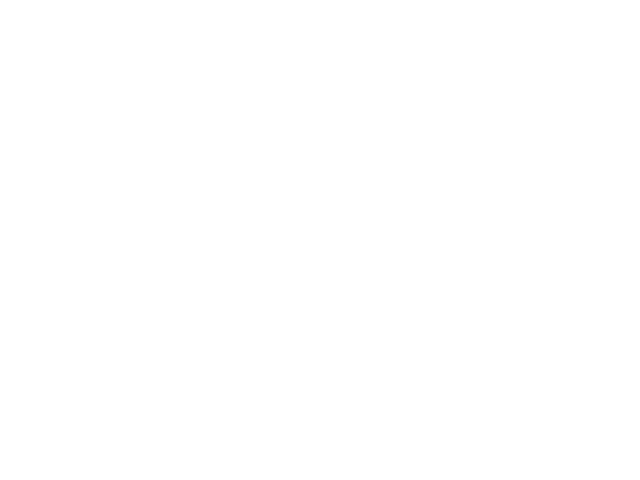

<IPython.core.display.Javascript object>


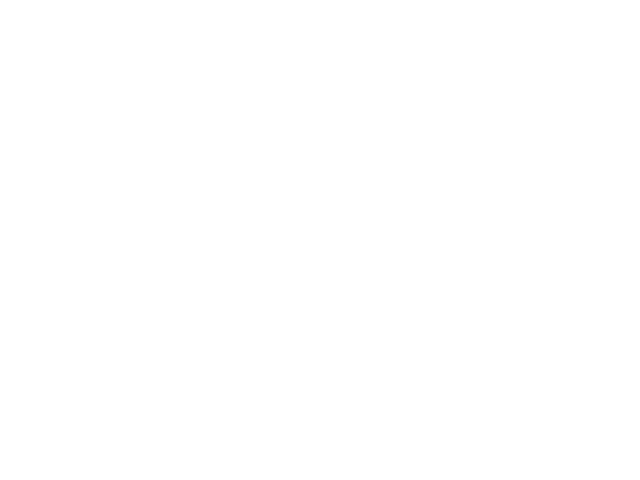

<IPython.core.display.Javascript object>


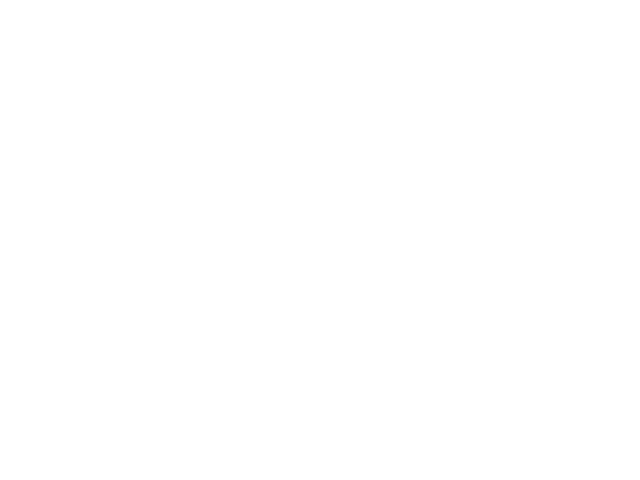

<IPython.core.display.Javascript object>


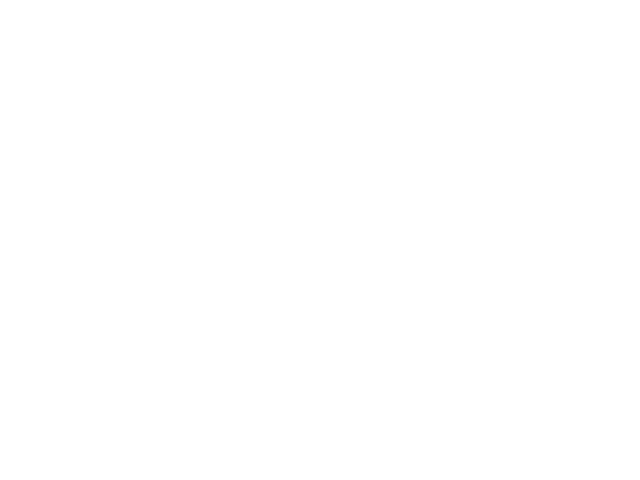

<IPython.core.display.Javascript object>


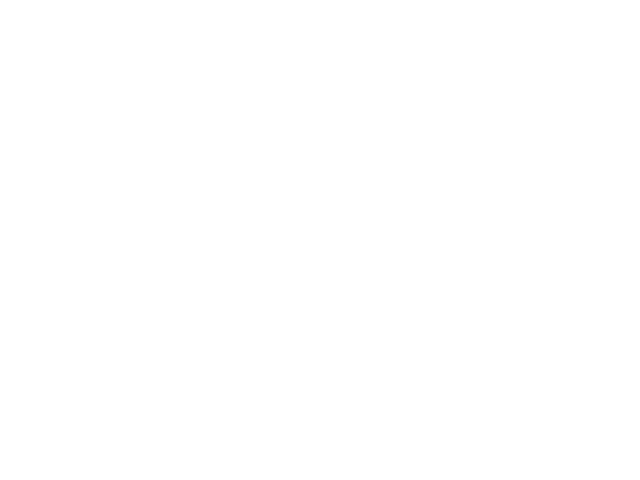

<IPython.core.display.Javascript object>


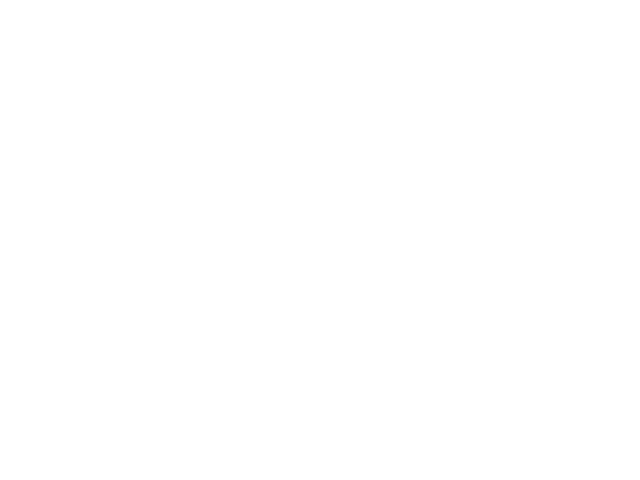

<IPython.core.display.Javascript object>


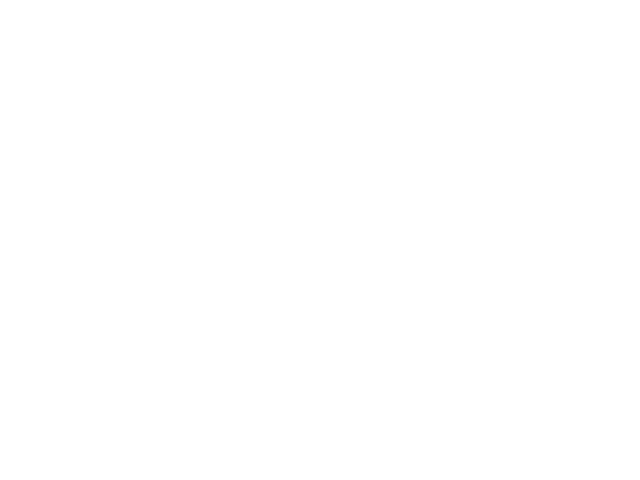

<IPython.core.display.Javascript object>


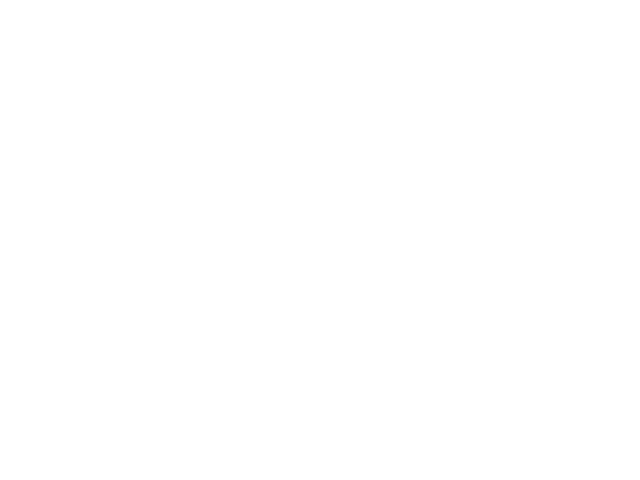

<IPython.core.display.Javascript object>


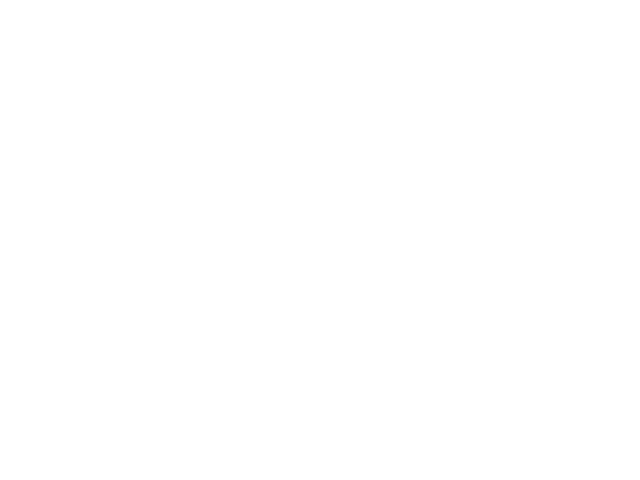

<IPython.core.display.Javascript object>


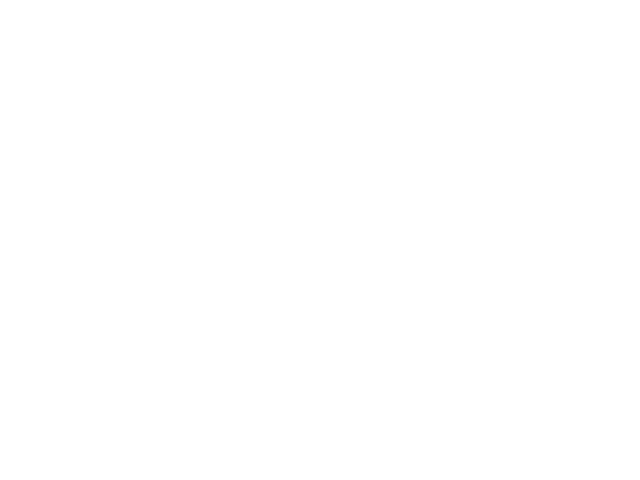

<IPython.core.display.Javascript object>


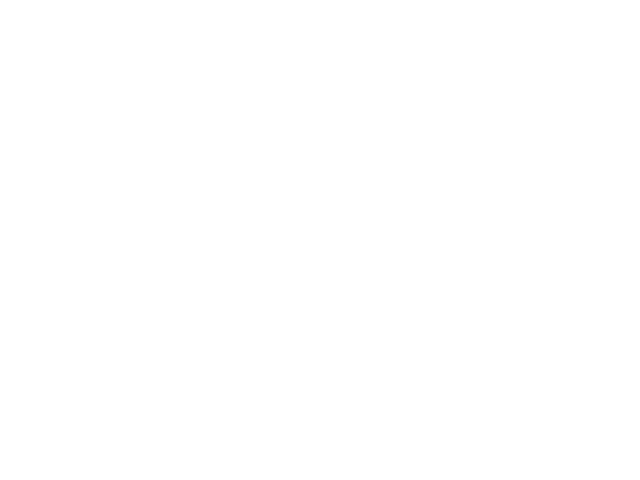

<IPython.core.display.Javascript object>


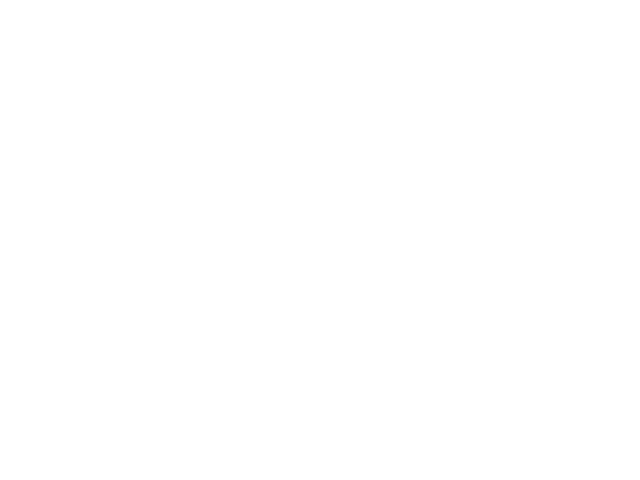

<IPython.core.display.Javascript object>


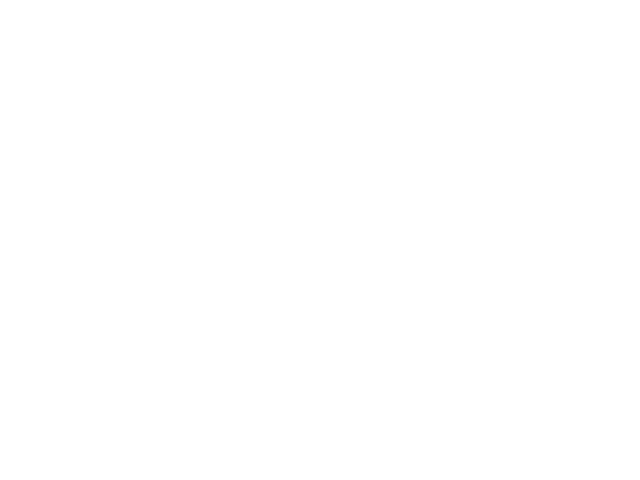

<IPython.core.display.Javascript object>


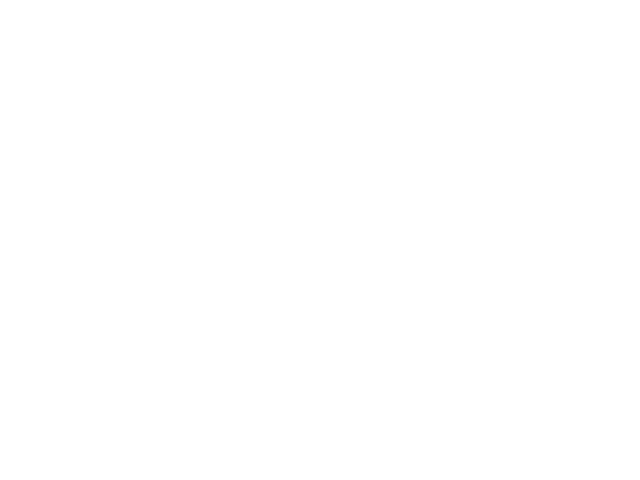

<IPython.core.display.Javascript object>


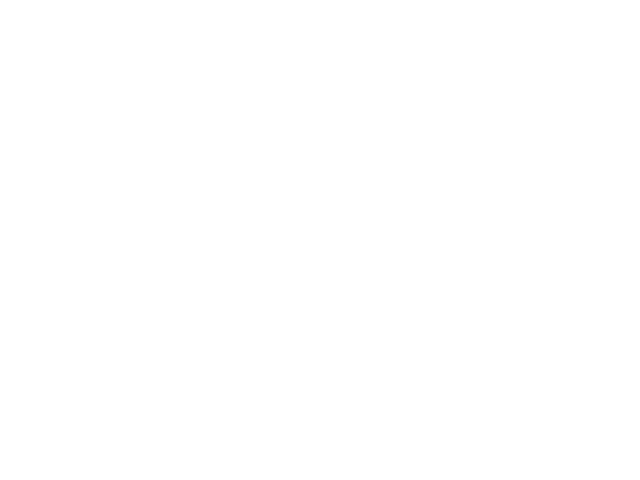

<IPython.core.display.Javascript object>


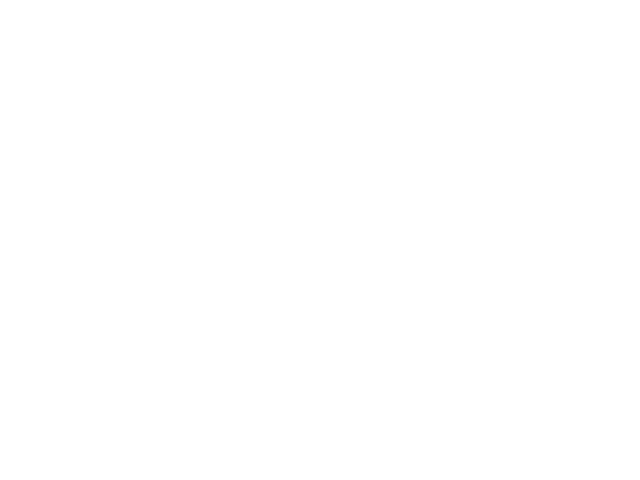

<IPython.core.display.Javascript object>


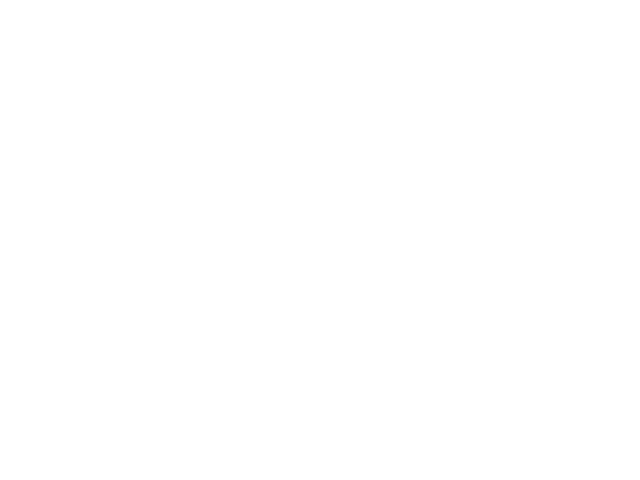

<IPython.core.display.Javascript object>


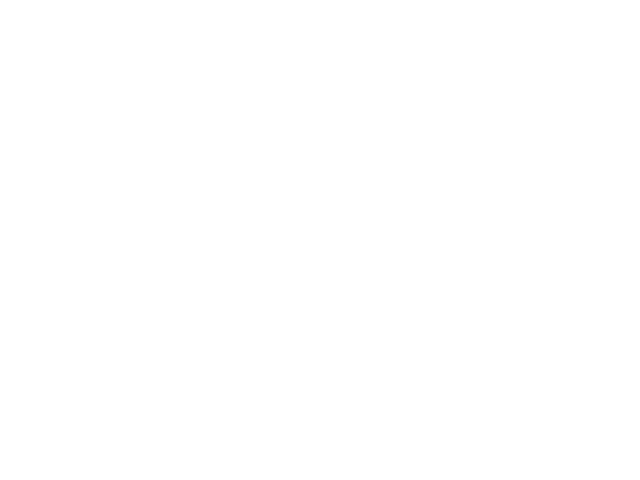

<IPython.core.display.Javascript object>


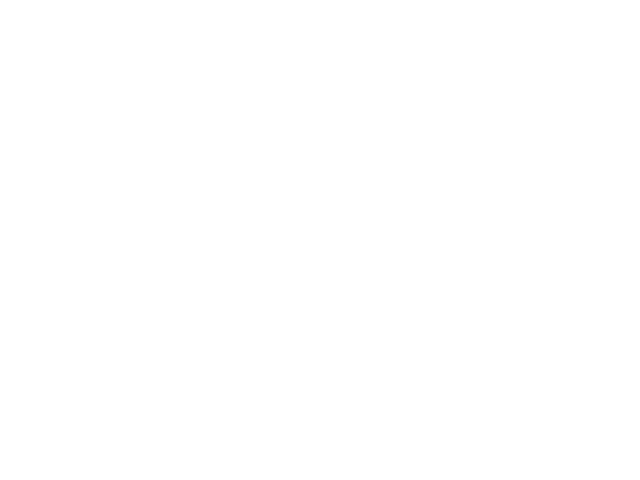

<IPython.core.display.Javascript object>


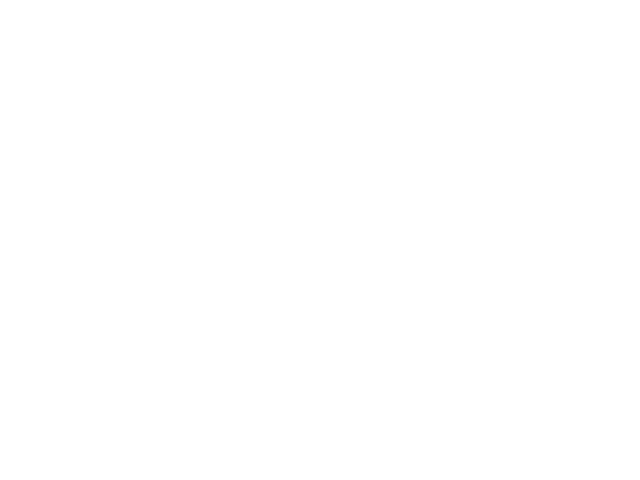

<IPython.core.display.Javascript object>


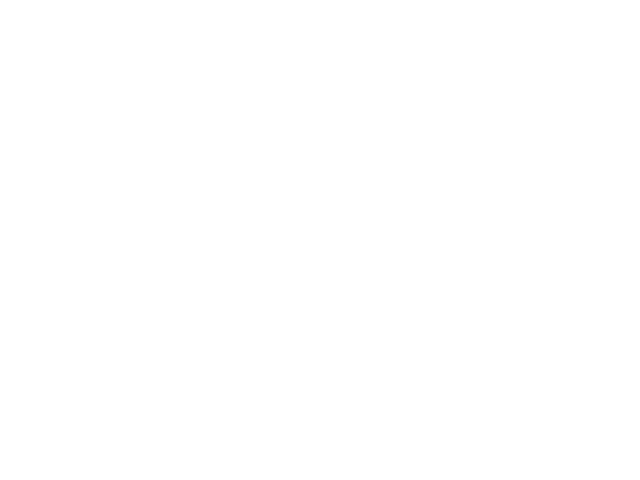

<IPython.core.display.Javascript object>


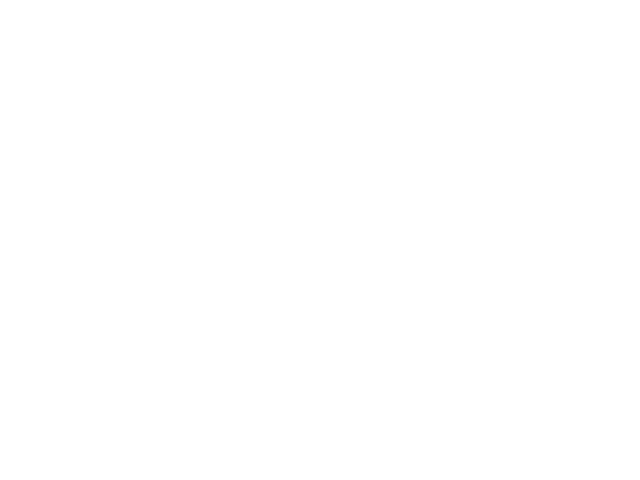

<IPython.core.display.Javascript object>


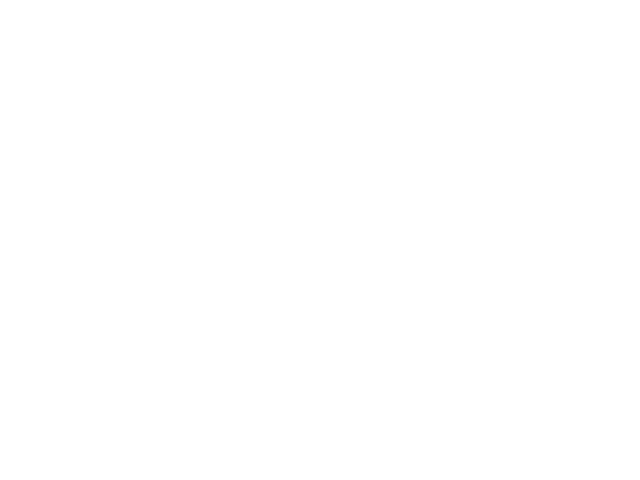

<IPython.core.display.Javascript object>


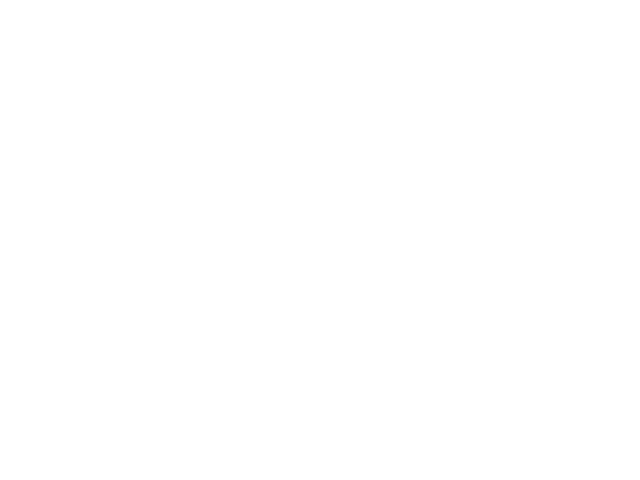

<IPython.core.display.Javascript object>


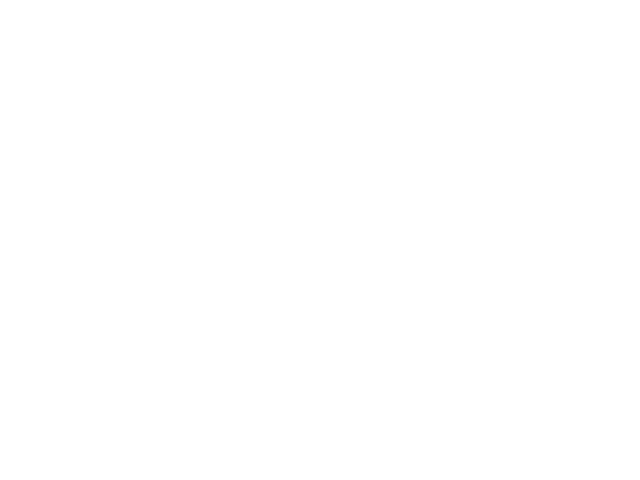

<IPython.core.display.Javascript object>


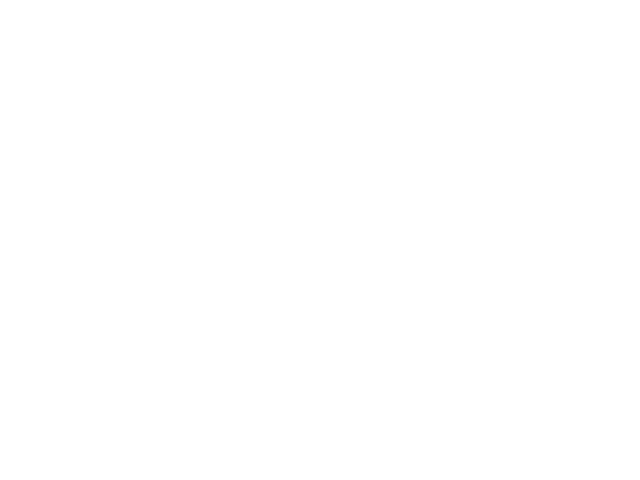

<IPython.core.display.Javascript object>


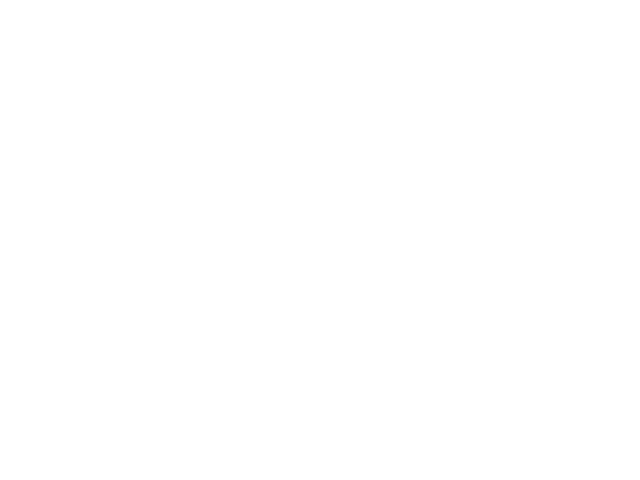

<IPython.core.display.Javascript object>


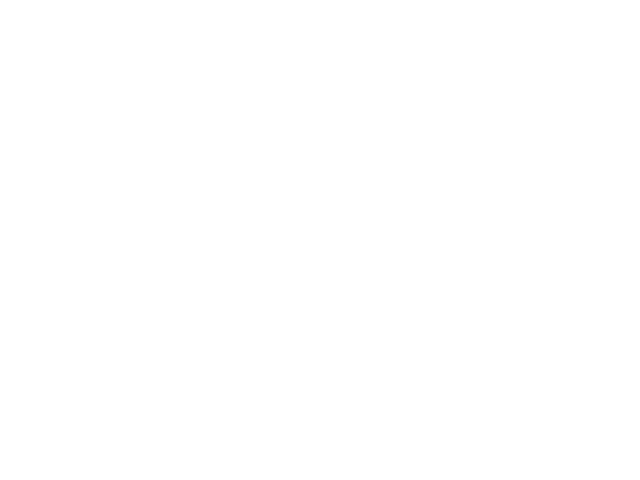

<IPython.core.display.Javascript object>


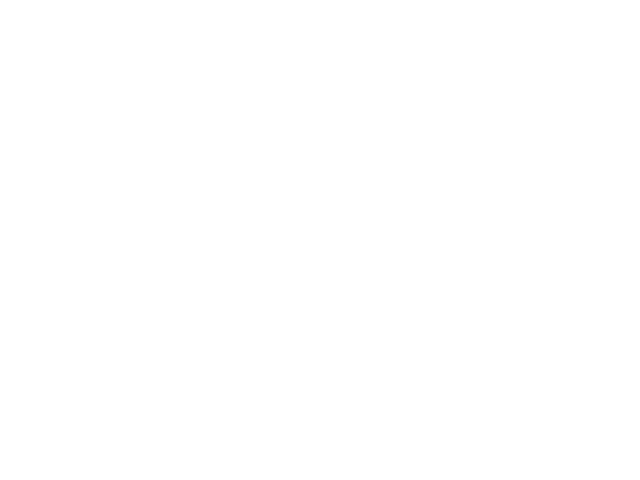

<IPython.core.display.Javascript object>


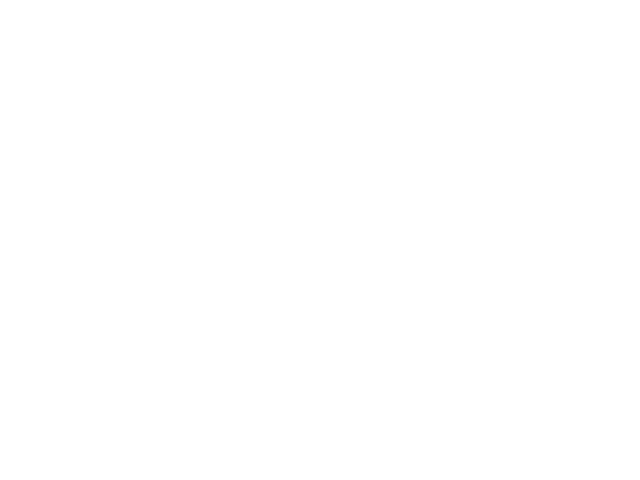

<IPython.core.display.Javascript object>


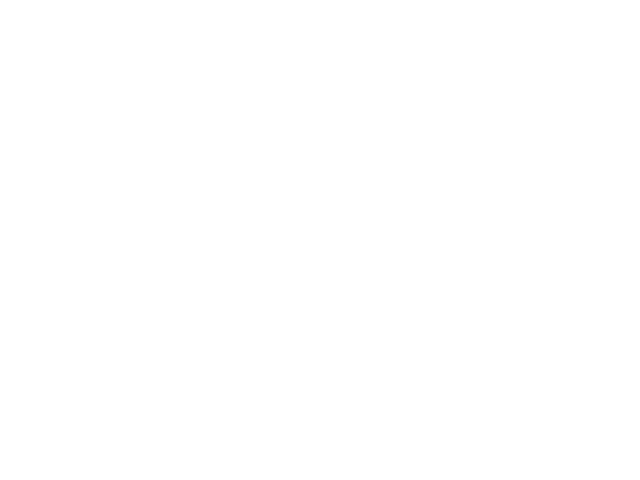

<IPython.core.display.Javascript object>


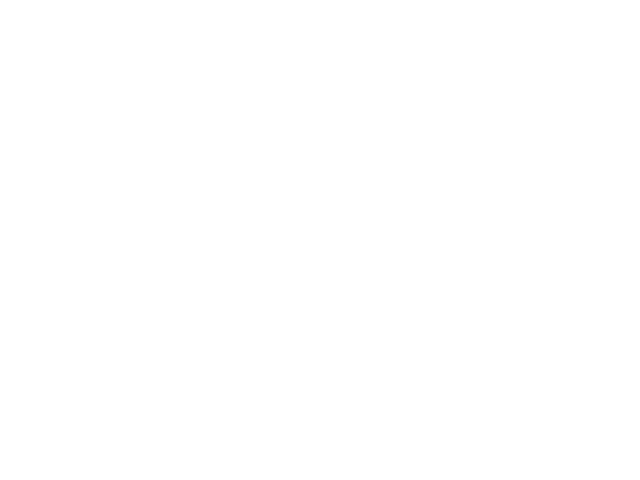

<IPython.core.display.Javascript object>


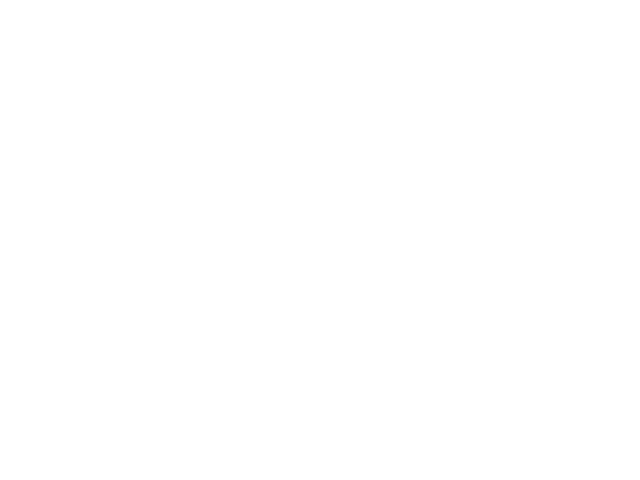

<IPython.core.display.Javascript object>


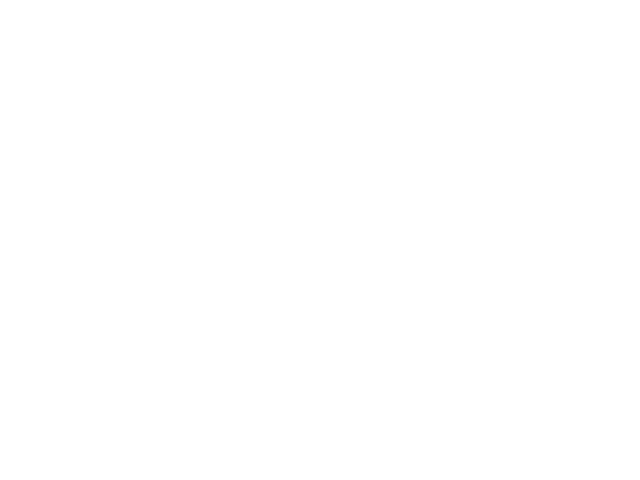

<IPython.core.display.Javascript object>


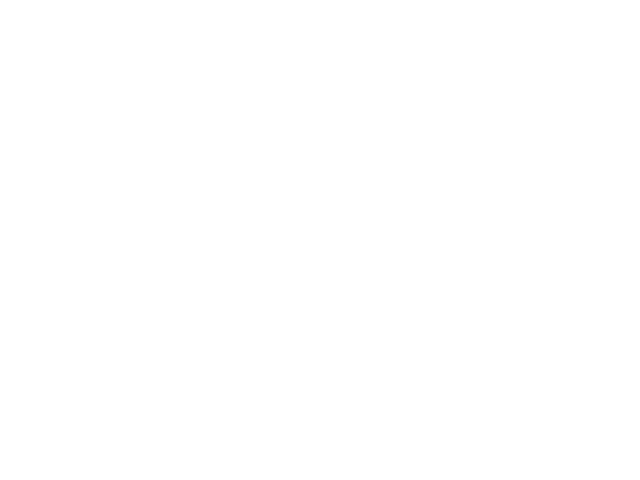

<IPython.core.display.Javascript object>


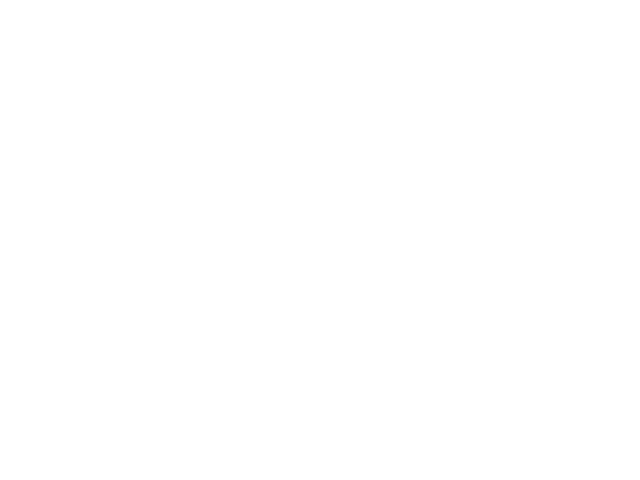

<IPython.core.display.Javascript object>


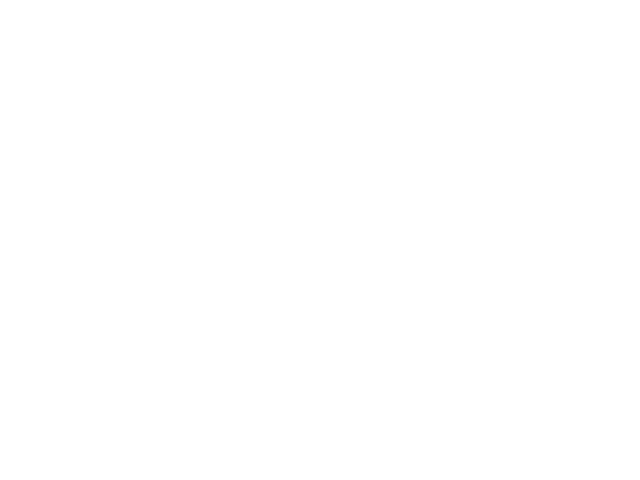

<IPython.core.display.Javascript object>


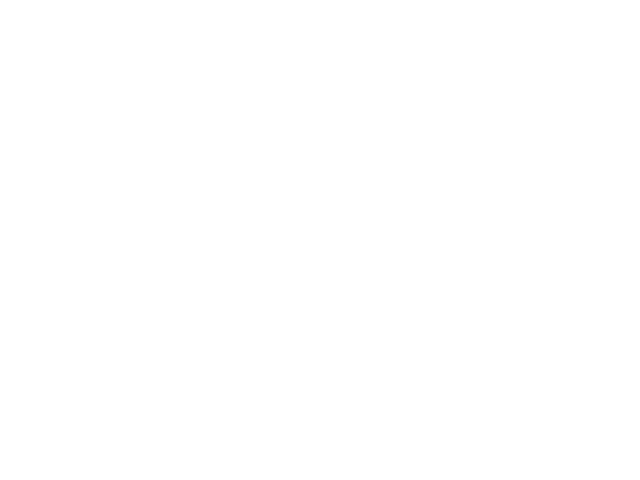

<IPython.core.display.Javascript object>


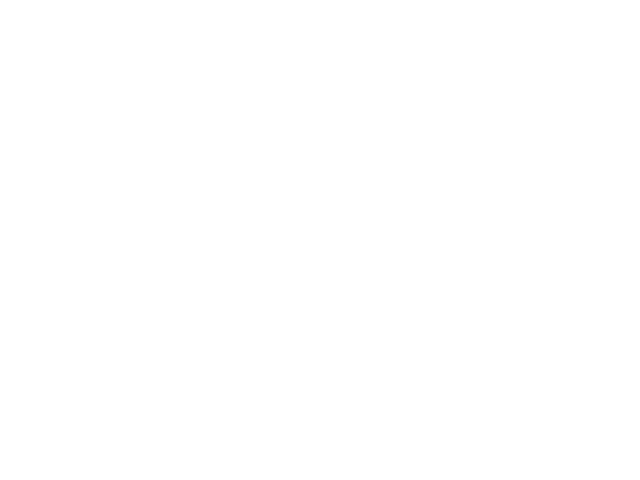

<IPython.core.display.Javascript object>


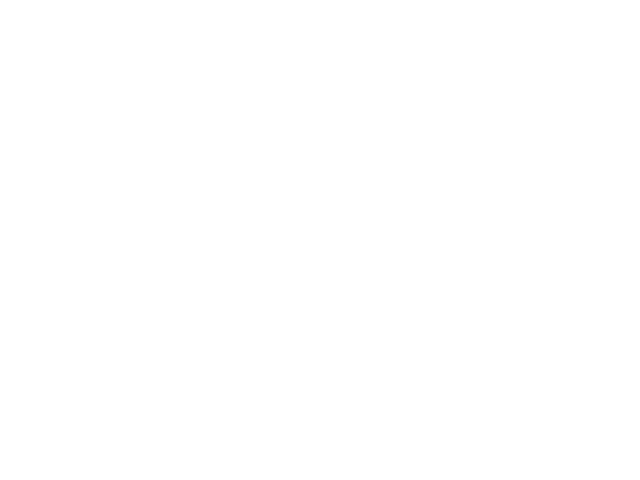

<IPython.core.display.Javascript object>


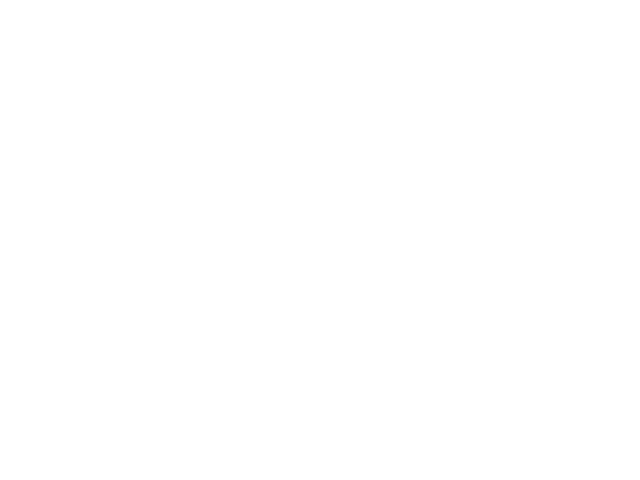

<IPython.core.display.Javascript object>


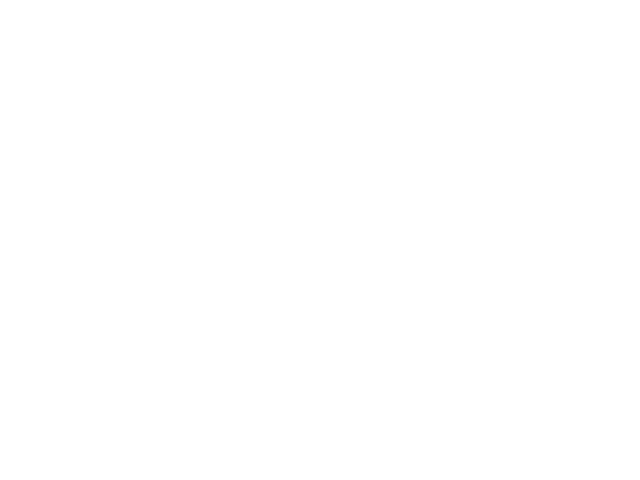

<IPython.core.display.Javascript object>


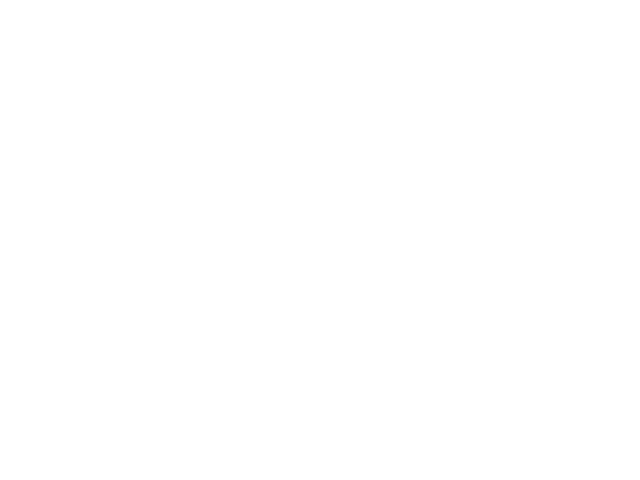

<IPython.core.display.Javascript object>


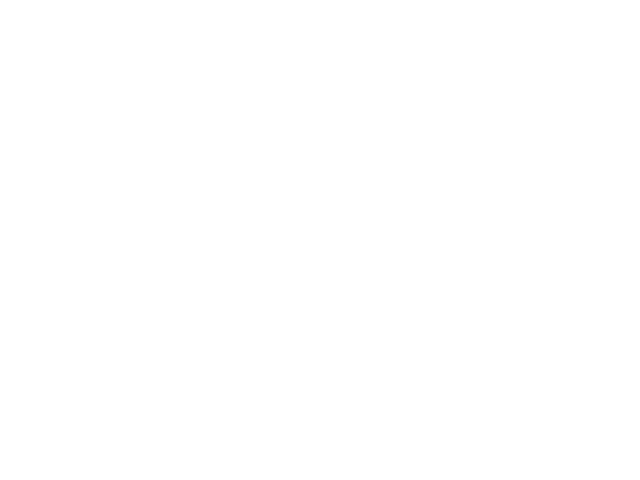

<IPython.core.display.Javascript object>


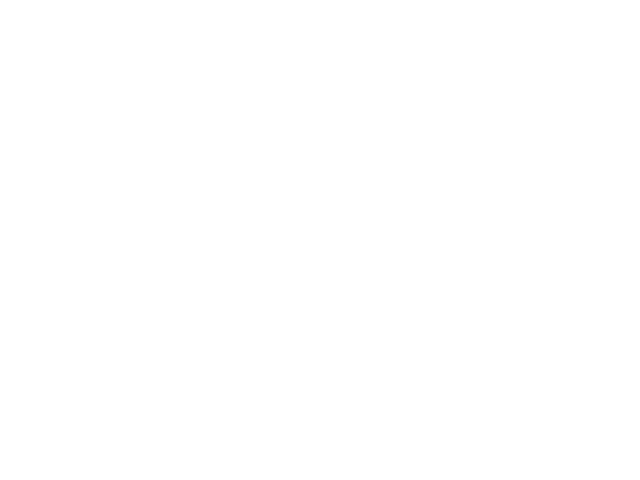

<IPython.core.display.Javascript object>


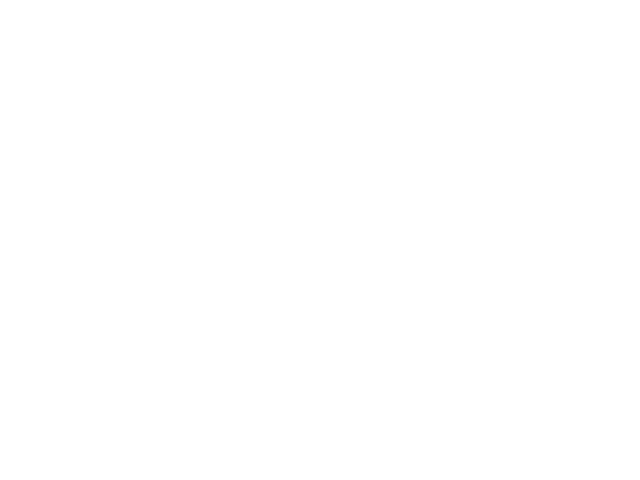

<IPython.core.display.Javascript object>


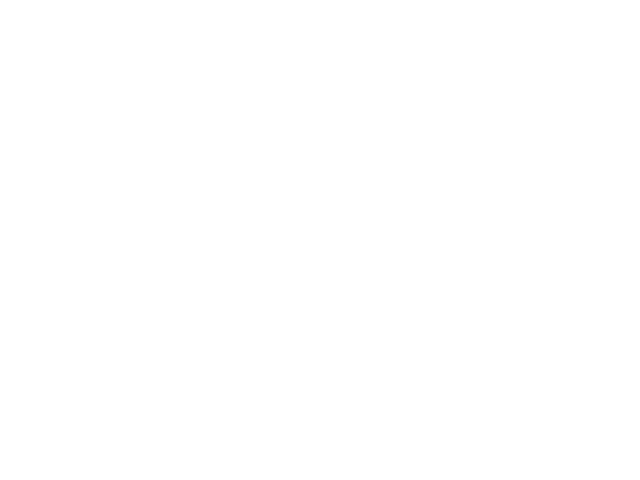

<IPython.core.display.Javascript object>


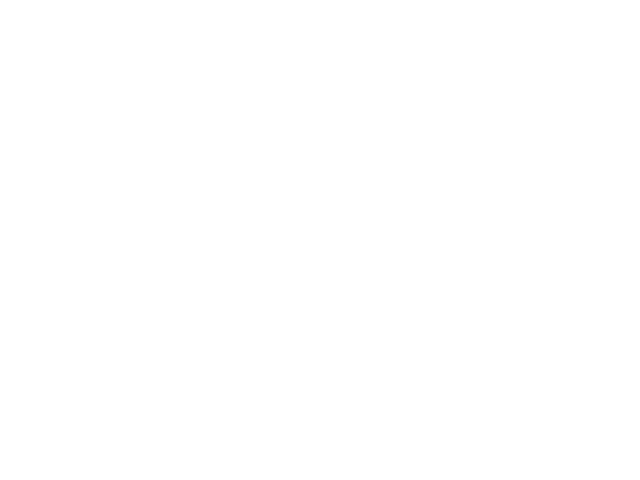

<IPython.core.display.Javascript object>


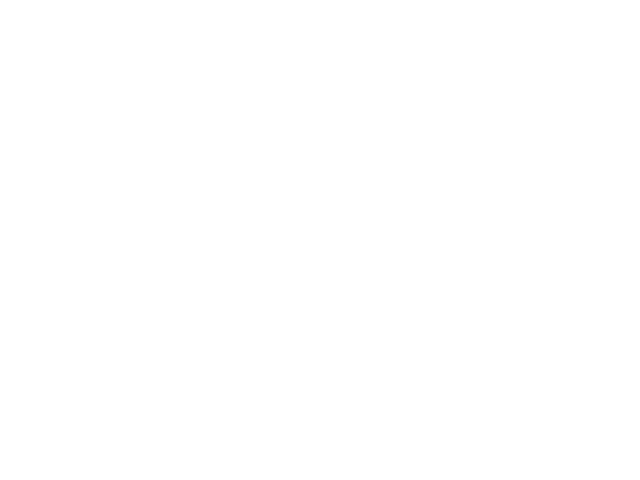

<IPython.core.display.Javascript object>


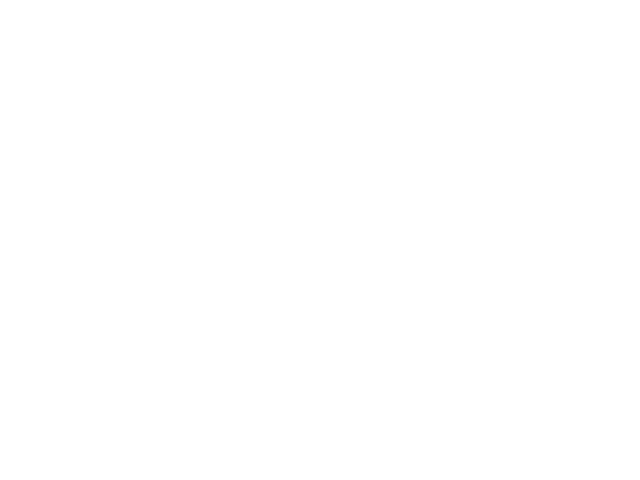

Using the data PSF
Made scene


<IPython.core.display.Javascript object>


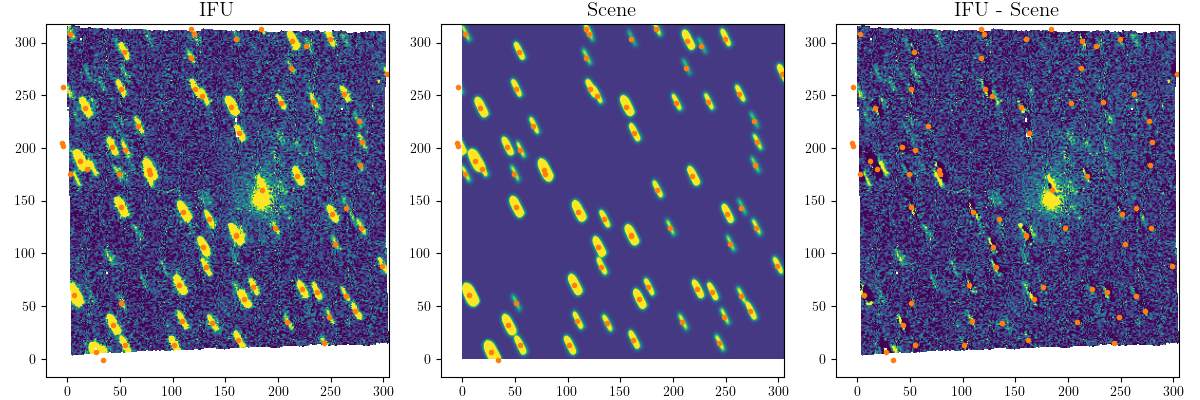

Saved reduction


In [2]:
test = starkiller(file='../2I_DATACUBE_FINAL_2020-03-19T05:46:49.016.fits',run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=True)



<IPython.core.display.Javascript object>


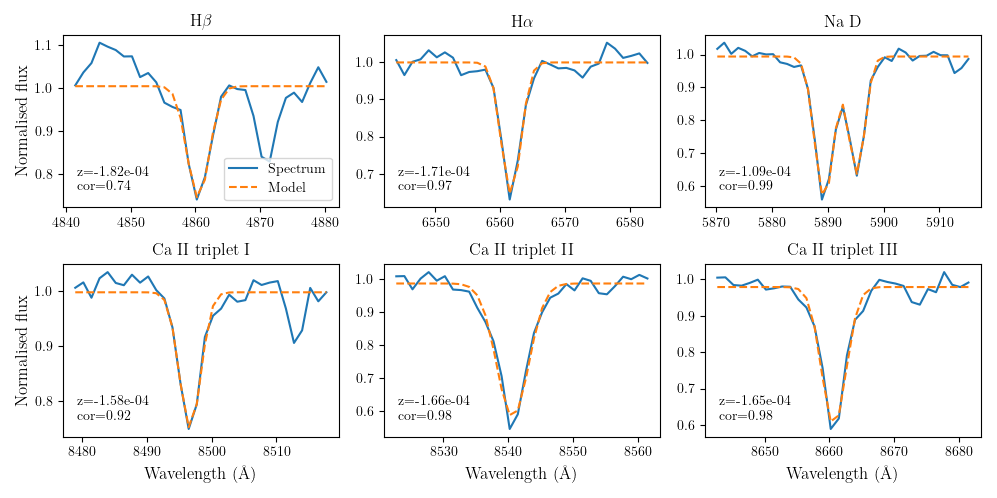

In [18]:
plot_z_shifts(test.specs[0])
plt.savefig('redshift_example.pdf',bbox_inches='tight')

In [9]:
x,y,_=test.wcs.all_world2pix(test.cat.ra.values,test.cat.dec.values,0,0)

<IPython.core.display.Javascript object>


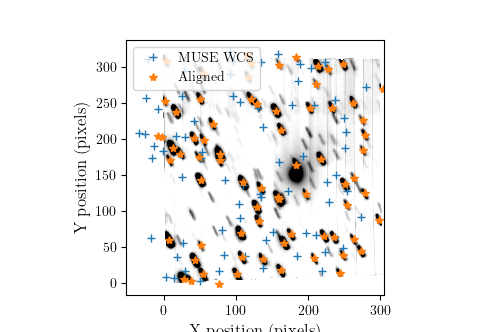

In [10]:
plt.figure(figsize=(1.5*fig_width,1*fig_width))
plt.imshow(test.image,vmin=0,vmax=20,origin='lower',cmap='gray_r')
plt.plot(x,y,'C0+',label='MUSE WCS')
plt.plot(test.cat.x.values,test.cat.y.values,'C1*',label='Aligned')
plt.legend()

plt.xlabel('X position (pixels)',fontsize=12)
plt.ylabel('Y position (pixels)',fontsize=12)
#plt.tight_layout()
plt.savefig('position_correction.pdf',bbox_inches='tight')

In [3]:
redind = int(np.where(test.cat.id.values == 5856950251941690752)[0])
blueind = int(np.where(test.cat.id.values == 5856950561179332352)[0])

In [4]:
red_spec = test.specs[redind]
blue_spec = test.specs[blueind]
red_model = test.models[redind]
blue_model = test.models[blueind]

<IPython.core.display.Javascript object>


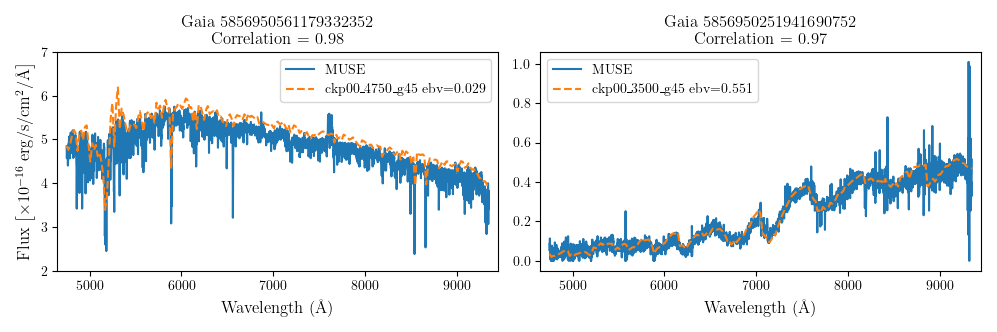

In [5]:
plt.figure(figsize=(1.5*fig_width*2,1*fig_width))
plt.subplot(121)
plt.title(f'Gaia 5856950561179332352 \nCorrelation = {np.round(test.cors[blueind],2)}')
plt.plot(blue_spec.wave,blue_spec.flux*1e16,label='MUSE')
plt.plot(blue_spec.wave,blue_model.sample(blue_spec.wave)/test.flux_corr*1e16,'--',label = blue_model.name)

plt.ylabel(r'Flux $\left[\rm \times10^{-16}\; erg/s/cm^2/\AA\right]$',fontsize=12)
plt.xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.xlim(min(red_spec.wave)-100,max(red_spec.wave)+100)
plt.ylim(2,7)

plt.legend()

plt.subplot(122)
plt.title(f'Gaia 5856950251941690752 \nCorrelation = {np.round(test.cors[redind],2)}')
plt.plot(red_spec.wave,red_spec.flux*1e16,label='MUSE')
plt.plot(red_spec.wave,red_model.sample(red_spec.wave)/test.flux_corr*1e16,'--',label = red_model.name)

plt.xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.xlim(min(red_spec.wave)-100,max(red_spec.wave)+100)

plt.legend()

plt.tight_layout()

#plt.savefig('Spec_match_example.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


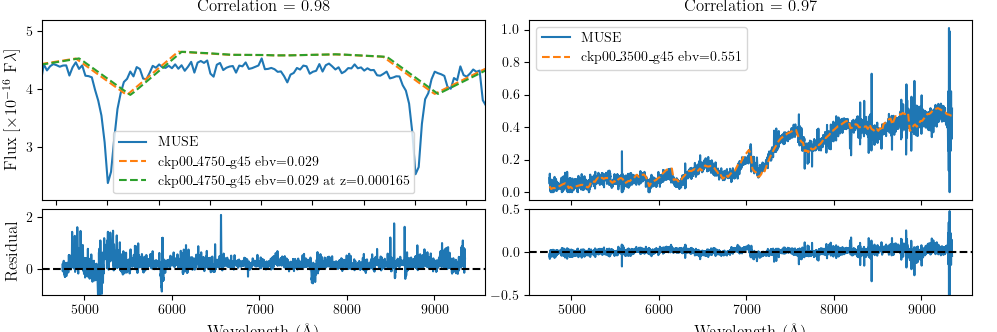

In [24]:
blue_model = test.models[blueind]
blue_model2 = test.models[blueind]
blue_model2 = blue_model2.redshift(-test.redshifts[blueind])

fig, axs = plt.subplot_mosaic('''
                               AB
                               AB
                               CD
                               ''',
                              figsize=(1.5*fig_width*2,1*fig_width))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.1)

axs['A'].plot(blue_spec.wave,blue_spec.flux*1e16,label='MUSE')
axs['A'].plot(blue_spec.wave,blue_model.sample(blue_spec.wave)/test.flux_corr*test.cat['containment'].values[blueind]*1e16,'--',label = blue_model.name)
axs['A'].plot(blue_spec.wave,blue_model2.sample(blue_spec.wave)/test.flux_corr*test.cat['containment'].values[blueind]*1e16,'--',label = blue_model2.name)
axs['A'].set_title(f'Gaia 5856950561179332352 \nCorrelation = {np.round(test.cors[blueind],2)}')
#axs['A'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; erg/s/cm^2/\AA\right]$',fontsize=12)
axs['A'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; F\lambda\right]$',fontsize=12)
axs['A'].set_ylim(2,7)
axs['A'].legend()

axs['C'].plot(blue_spec.wave,blue_model.sample(blue_spec.wave)/test.flux_corr*test.cat['containment'].values[blueind]*1e16 - blue_spec.flux*1e16)
axs['C'].axhline(0,color='k',ls='--')
axs['C'].set_ylabel('Residual',fontsize=12)
axs['C'].set_ylim(-1,2.3)
axs['C'].set_xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

axs['B'].plot(red_spec.wave,red_spec.flux*1e16,label='MUSE')
axs['B'].plot(red_spec.wave,red_model.sample(red_spec.wave)/test.flux_corr*1e16,'--',label = red_model.name)
axs['B'].set_title(f'Gaia 5856950251941690752 \nCorrelation = {np.round(test.cors[redind],2)}')
axs['B'].legend()
#axs['A'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; erg/s/cm^2/\AA\right]$',fontsize=12)
#axs['B'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; F\lambda\right]$',fontsize=12)


axs['D'].plot(red_spec.wave,red_model.sample(red_spec.wave)/test.flux_corr*1e16 - red_spec.flux*1e16)
axs['D'].axhline(0,color='k',ls='--')
axs['D'].set_ylim(-0.5,0.5)
axs['D'].set_xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.savefig('Spec_match_example_residual.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


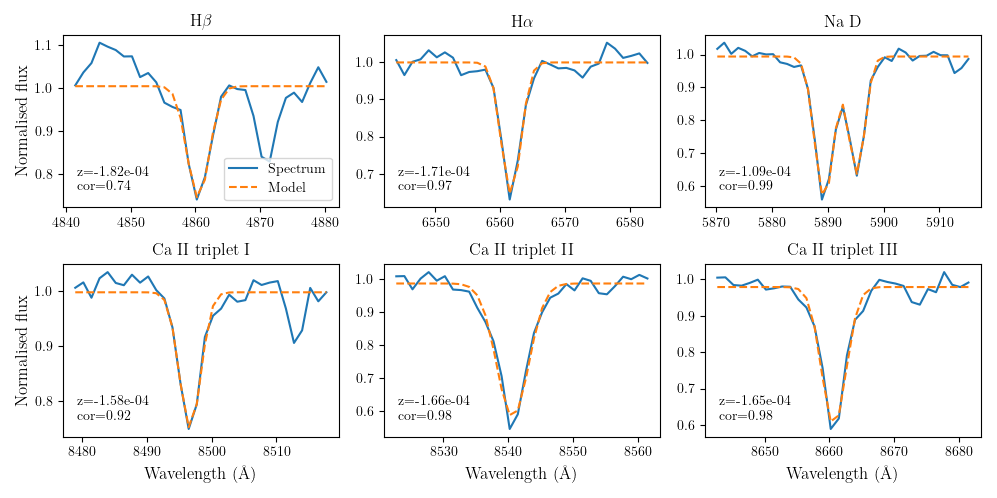

In [22]:
plot_z_shifts(test.specs[0])
plt.savefig('redshift_example.pdf',bbox_inches='tight')

In [8]:
a,b,c = match_spec_to_model(test.specs[0],'ck')

In [13]:
test.filts

array(['GAIA/GAIA3.G'], dtype=object)

In [18]:
a,b,c,d = spec_match([test.specs[0]],test.mags[0],test.filts,model_type=test.spec_cat,num_cores=test.numcores)

<IPython.core.display.Javascript object>


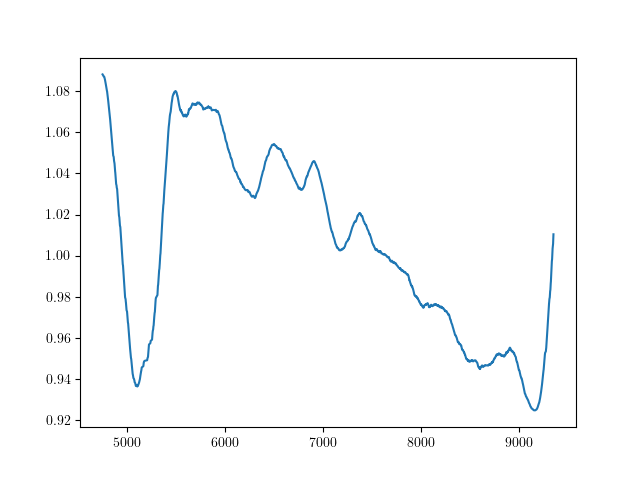

In [7]:
plt.figure()
plt.plot(test.specs[0].wave,test.flux_corr)
#plt.plot(a[0].wave,a[0].flux)

In [25]:
ext, ebv = fit_extinction(a[0],test.specs[0])

In [41]:
spec = test.specs[0]
model = a[0]
Rv=3.1

def ebv_minimiser(ebv,model,spec,Rv=3.1):
    ext = S.ArraySpectrum(model.wave, 
                    apply(fitzpatrick99(model.wave.astype('double'),ebv*Rv,Rv),model.flux))
    interp = ext.sample(spec.wave)
    corr = pearsonr(savgol_filter(spec.flux,101,1),savgol_filter(interp,101,1))[0]
    res = -corr
    print(corr)
    return res

In [48]:
ext = S.ArraySpectrum(model.wave, 
                apply(fitzpatrick99(model.wave.astype('double'),0.0*Rv,Rv),model.flux),name=model.name + ' ebv=' + str(np.round(ebv,3)))




<IPython.core.display.Javascript object>


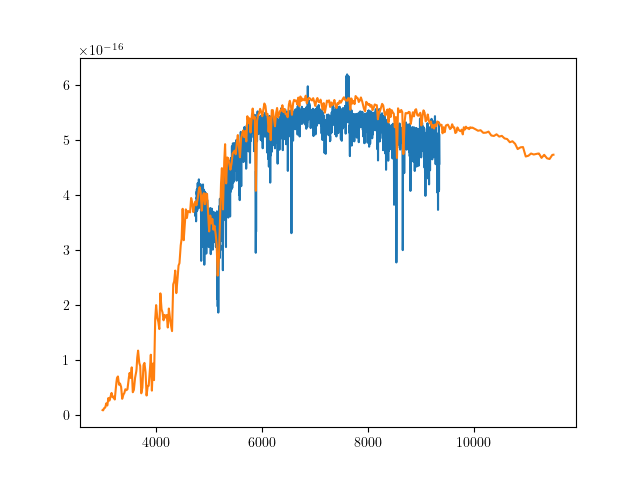

In [49]:
plt.figure()
plt.plot(test.specs[0].wave,test.specs[0].flux*test.flux_corr)
plt.plot(ext.wave,ext.flux)

In [50]:
test.cat

_q          ra        dec                   id  e_RA_ICRS  e_DE_ICRS  \
118   1  192.893161 -69.140111  5856950561179332352     0.0412     0.0437   
8     1  192.889926 -69.143134  5856949805265086464     0.0459     0.0501   
121   1  192.892345 -69.133027  5856950561179337216     0.0623     0.0632   
120   1  192.882090 -69.133489  5856950561179336704     0.0626     0.0646   
119   1  192.886307 -69.135445  5856950561179334912     0.0762     0.0746   
..   ..         ...        ...                  ...        ...        ...   
116   1  192.886099 -69.140531  5856950561150900864     2.4202     4.1014   
75    1  192.851292 -69.130874  5856950251913256192     1.4953     2.1878   
71    1  192.853099 -69.135286  5856950251912092416     1.9333     1.6722   
74    1  192.858541 -69.127008  5856950251913255808     1.6520     1.3603   
77    1  192.869215 -69.126579  5856950251913421568     3.0379     1.5499   

        Plx   e_Plx      PM   pmRA  ...        G_filt           x           y  \
118  0.7897  0.0511   8.355 -7.396  ...  GAIA/GAIA3.G    6.904500   60.327273   
8    0.3430  0.0584   6.343 -6.320  ...  GAIA/GAIA3.G   27.311548    5.998741   
121  1.3990  0.0759  23.049 -6.730  ...  GAIA/GAIA3.G   12.240713  187.660547   
120  0.2351  0.0778   3.515 -3.330  ...  GAIA/GAIA3.G   77.873198  178.748842   
119  0.2647  0.0922   7.993 -7.885  ...  GAIA/GAIA3.G   50.877053  143.556980   
..      ...     ...     ...    ...  ...           ...         ...         ...   
116     NaN     NaN     NaN    NaN  ...  GAIA/GAIA3.G   50.819487   52.809021   
75      NaN     NaN     NaN    NaN  ...  GAIA/GAIA3.G  276.423084  225.697812   
71      NaN     NaN     NaN    NaN  ...  GAIA/GAIA3.G  264.820377  143.508214   
74      NaN     NaN     NaN    NaN  ...  GAIA/GAIA3.G  226.715066  296.318091   
77      NaN     NaN     NaN    NaN  ...  GAIA/GAIA3.G  160.444729  303.294752   

     xint  yint  fuzz  cal_source  containment  x_offset  y_offset  
118     7    60     0           1     0.985952 -0.095500  0.327273  
8      28     6     0           0     0.829337 -0.688452 -0.001259  
121    12   187     0           1     1.000000  0.240713  0.660547  
120    77   179     0           1     1.000000  0.873198 -0.251158  
119    51   144     0           1     1.000000 -0.122947 -0.443020  
..    ...   ...   ...         ...          ...       ...       ...  
116    52    52     0           0     1.000000 -1.180513  0.809021  
75    275   227     0           0     1.000000  1.423084 -1.302188  
71    263   147     0           0     1.000000  1.820377 -3.491786  
74    228   296     0           0     1.000000 -1.284934  0.318091  
77    160   304     0           0     0.983350  0.444729 -0.705248  

[71 rows x 68 columns]

In [42]:
lam = spec.wave
ebv0 = 0.04
bounds = [[0,1]]
res = minimize(ebv_minimiser, ebv0,args=(model,spec,Rv),method='Powell',bounds=bounds)
ebv = res.x[0]
ext = S.ArraySpectrum(model.wave, 
                apply(fitzpatrick99(model.wave.astype('double'),ebv*Rv,Rv),model.flux),name=model.name + ' ebv=' + str(np.round(ebv,3)))

0.03248723131600123
-0.43268754798445974
-0.5546908753514007
-0.30841719824105923
-0.1901024361362786
-0.0881945549286143
-0.008902465811103271
0.04797847811816342
0.08655288226560832
0.1117895129039919
0.12793836139066167
0.13813334849778416
0.14451686355857754
0.14849382666869265
0.15096388044018152
0.15249510815211037
0.15344323698223597
0.15402989237769096
0.1543927250093151
0.1546170671096126
0.15475575604940178
0.15498022079251428
-0.5546908753514007
-0.43268754798445996
-0.30841719824105923
-0.1901024361362786
-0.0881945549286143
-0.00890246581110328
0.0479784781181634
0.08655288226560832
0.1117895129039919
0.12793836139066161
0.13813334849778416
0.14451686355857754
0.14849382666869265
0.15096388044018147
0.15249510815211037
0.15344323698223597
0.1540298923776909
0.15439272500931503
0.1546170671096126
0.1547557560494018
0.15484148500448297
0.15489447394232408
0.154927225019191
0.15494746710468782
0.15495997770971112
0.15496770980655175
0.15497248855016738
-0.5546908753514007
-0.

In [40]:
ebv

2.242426131004774e-09

In [23]:
a[0].name

'ckp00_4750_g45 at z=0.000165057 ebv=0.0'

In [12]:
spec_match(test.specs[0],)

-0.00016505705996761044

In [10]:
a.name

'ckp00_4750_g45 at z=0.000165057'

<IPython.core.display.Javascript object>


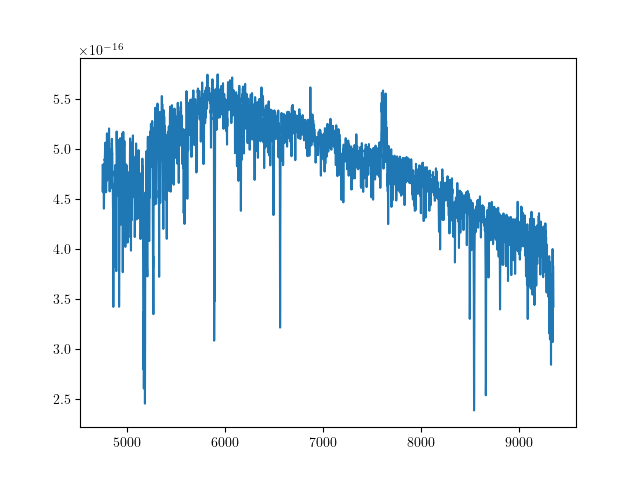

ValueError: operands could not be broadcast together with shapes (17000,) (3681,) 

In [59]:
plt.figure()

for i in conds:
    plt.plot(test.specs[i].wave,test.specs[i].flux)
    plt.plot(test.models[i].wave,test.models[i].flux,'--')

In [51]:

ind = np.argsort(test.cat[test.ref_filter].values)#
conds = np.where(((test.cors[ind] > 0.9) | (test.cat['cal_source'].values[ind])) & (test.cat[test.ref_filter].values <= test.cal_maglim) & (test.cat.fuzz.values == 0) )[0]
    

In [52]:
(test.cors[ind] > 0.9) & (test.cat[test.ref_filter].values <= test.cal_maglim)

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [53]:
conds

array([0, 1, 2, 3, 4, 5])

<IPython.core.display.Javascript object>


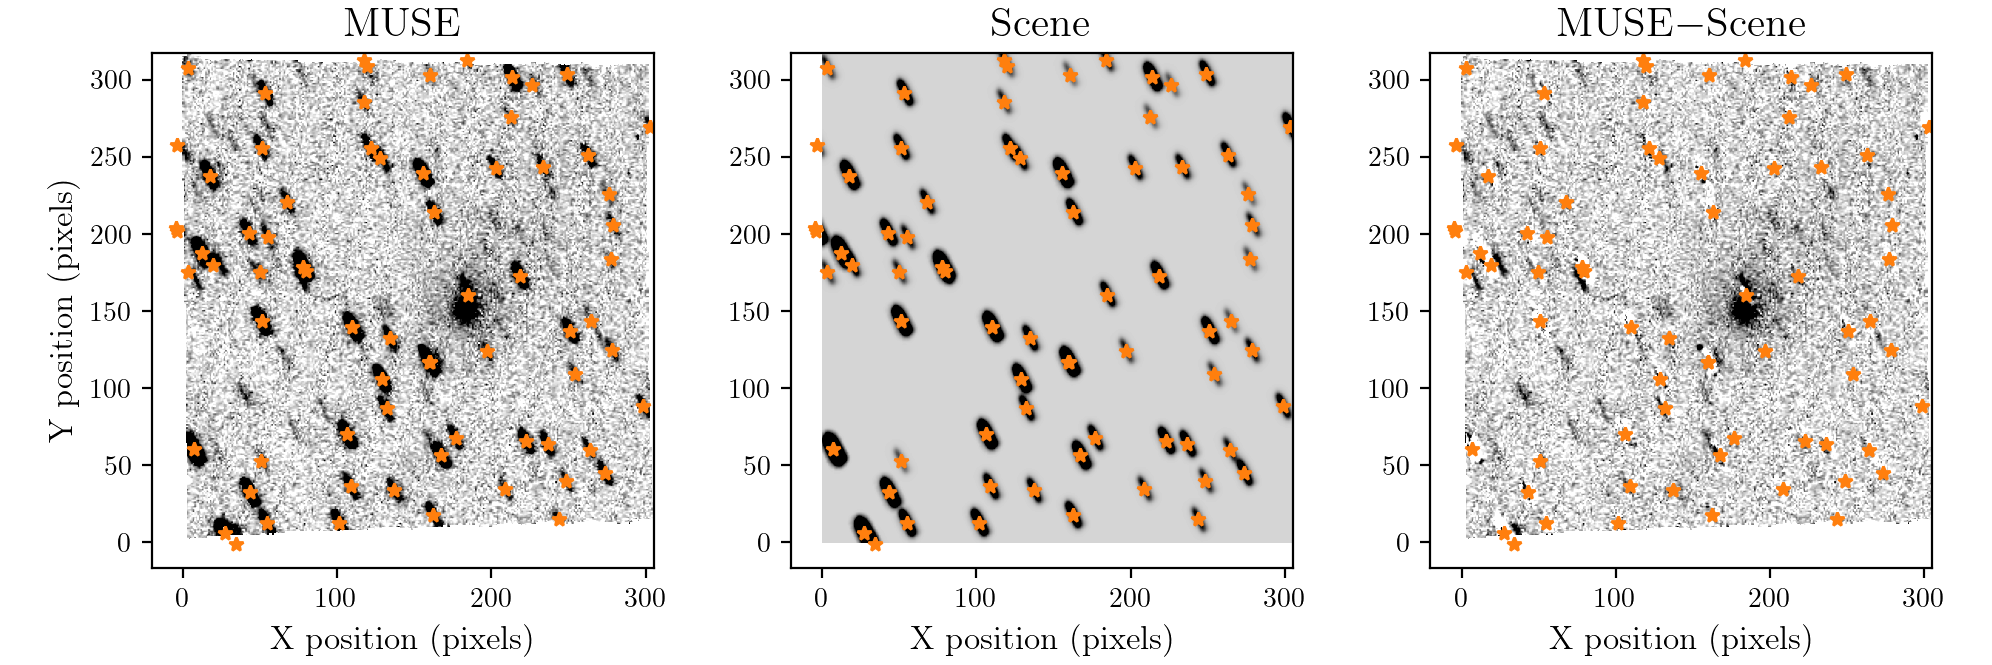

In [3]:
ind = 1800
image = test.cube[ind]#np.nanmedian(test.cube,axis=0)
scene = test.scene.sim[ind]#np.nanmedian(test.scene.sim,axis=0)
diff = test.diff[ind]#np.nanmedian(test.diff,axis=0)

vmin = np.nanpercentile(image,16)
vmax = np.nanpercentile(image,95)

x = test.cat.xint + test.cat.x_offset
y = test.cat.yint + test.cat.y_offset

plt.figure(figsize=(1.5*fig_width*2,1*fig_width))
plt.subplot(131)
plt.title('MUSE',fontsize=15)
plt.imshow(image,origin='lower',vmin=vmin,vmax=vmax,cmap='gray_r')
plt.plot(x,y,'C1*',ms=5)

plt.xlabel('X position (pixels)',fontsize=12)
plt.ylabel('Y position (pixels)',fontsize=12)

plt.subplot(132)
plt.title('Scene',fontsize=15)
plt.imshow(scene,origin='lower',vmin=vmin,vmax=vmax,cmap='gray_r')
plt.plot(x,y,'C1*',ms=5)
plt.xlabel('X position (pixels)',fontsize=12)

plt.subplot(133)
plt.title('MUSE$ - $Scene',fontsize=15)
plt.imshow(diff,origin='lower',vmin=vmin,vmax=vmax,cmap='gray_r')
plt.plot(x,y,'C1*',ms=5)
plt.xlabel('X position (pixels)',fontsize=12)

plt.tight_layout()
plt.savefig('Subtraction_example.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


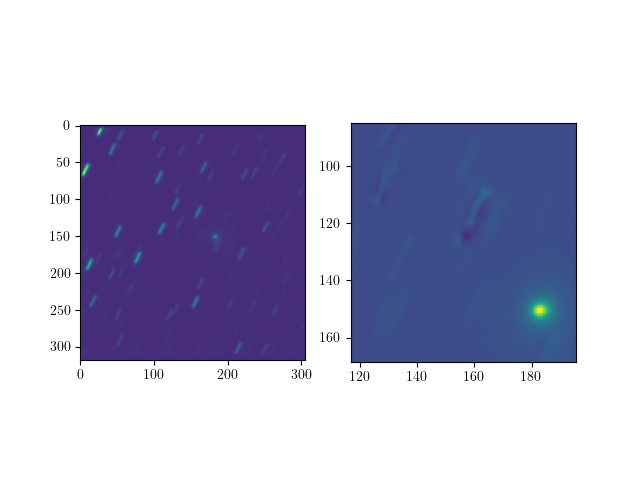

In [6]:
plt.figure()
plt.subplot(121)
plt.imshow(np.nansum(test.cube,axis=0))
plt.subplot(122)
plt.imshow(np.nanmedian(test.diff,axis=0))

In [12]:
corr_limit=0.9
order = 3
cors = deepcopy(test.cors)
cors[test.cat['cal_source'].values == 0] = 0
#cors[(test.cat['cal_source'].values == 1)][~test.good_cals] = 0

ind = np.argsort(test.cat[test.ref_filter].values)#
conds = np.where(((test.cors[ind] > corr_limit) | (test.cat['cal_source'].values[ind])) & (test.cat[test.ref_filter].values < test.cal_maglim))[0]
if len(conds) > 1:
    diffs = []
    for i in ind[conds]:
        print(test.cat[test.ref_filter].values[i])
        diffs += [test.models[i].sample(test.specs[i].wave) / test.specs[i].flux]
    diff = np.nanmedian(np.array(diffs),axis=0)
    fin = np.where(np.isfinite(diff))
    poly_param = np.polyfit(test.lam[fin],diff[fin],order)
    pf = np.polyval(poly_param,test.lam)
else:
    pf = np.ones_like(test.lam)

16.872631
17.039876999999997
17.472904
17.603271
17.861894999999997
17.891674
18.001831
18.027744
18.074779
18.310225
18.342049
18.422732999999997
18.50894
18.524144999999997
18.842986999999997
18.875716999999998
18.956145999999997
18.994754999999998


In [13]:
from scipy.signal import savgol_filter

In [99]:
ss = savgol_filter(diff,401,3)

<IPython.core.display.Javascript object>


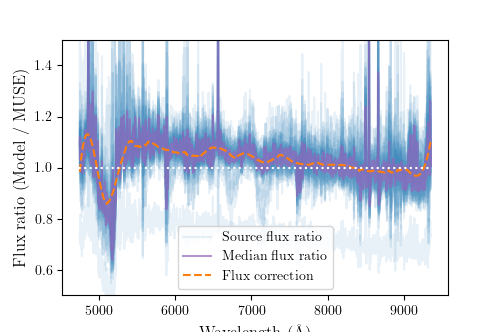

In [14]:
plt.figure(figsize=(1.5*fig_width,1*fig_width))
for i in range(len(diffs)):
    if i > 0:
        plt.plot(test.lam[fin],diffs[i][fin],'C0',alpha=0.1)
    else:
        plt.plot(test.lam[fin],diffs[i][fin],'C0',alpha=0.1,label='Source flux ratio')
plt.plot(test.lam[fin],diff[fin],'C4',alpha=0.7,label='Median flux ratio')
#plt.plot(test.lam[fin],pf,'C2',alpha=0.5,label='Model')
#plt.plot(test.lam[fin],ss,'C2',alpha=0.5,label='Model 2')
plt.plot(red_spec.wave,test.flux_corr,'C1--',label='Flux correction')
plt.axhline(1,color='white',ls=':')
plt.legend(loc='lower center')

plt.ylim(0.5,1.5)
plt.ylabel(r'Flux ratio (Model $/$ MUSE)',fontsize=12)
plt.xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.savefig('Flux_correction.pdf',bbox_inches='tight')

In [112]:
test.lam[0] - test.lam[500]

-625.0000000000009

<IPython.core.display.Javascript object>


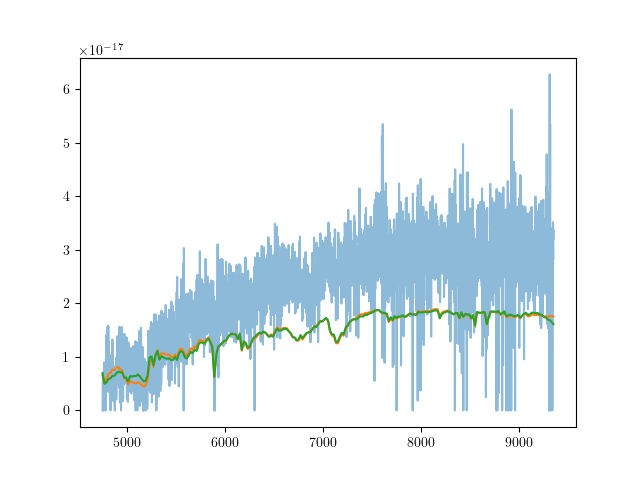

In [111]:
i = -10
plt.figure()
plt.plot(test.lam[fin],test.specs[i].flux ,'C0',alpha=0.5)
plt.plot(test.lam[fin],test.models[i].sample(test.specs[i].wave)/pf ,'C1')
plt.plot(test.lam[fin],test.models[i].sample(test.specs[i].wave)/ss ,'C2')


In [105]:
Ha = 6562.79
Hb = 4861.35
Hgam = 4340.472 #410.1734[2]	397.0075[2]	388.9064[2]	383.5397[2]

<IPython.core.display.Javascript object>


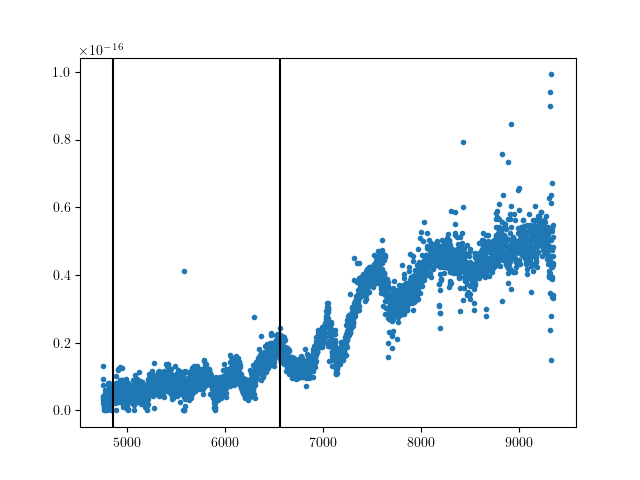

In [10]:
s = test.specs[redind]
plt.figure()
plt.plot(s.wave,s.flux,'.')
plt.axvline(Ha,color='k')
plt.axvline(Hb,color='k')